In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [3]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()
data_dem2 = pd.read_excel('data/demog.xlsx')

In [4]:
state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
N = np.sum(data_dem)
data_dem2 = pd.read_excel('demog.xlsx')

In [5]:
#LOAD VACC DATA
y = state

vac1 = pd.read_csv('VACC/vacc_data_new/vac_'+ y + '.csv')

In [6]:
pop = data_dem
vacc_1 = np.zeros([6, 600])

vacc_1[0,0:258] = vac1['0_4'].to_numpy()
vacc_1[1,0:258] = vac1['5_12'].to_numpy()
vacc_1[2,0:258] = vac1['13_17'].to_numpy()
vacc_1[3,0:258] = vac1['18_49'].to_numpy()
vacc_1[4,0:258] = vac1['50_64'].to_numpy()
vacc_1[5,0:258] = vac1['65+'].to_numpy()




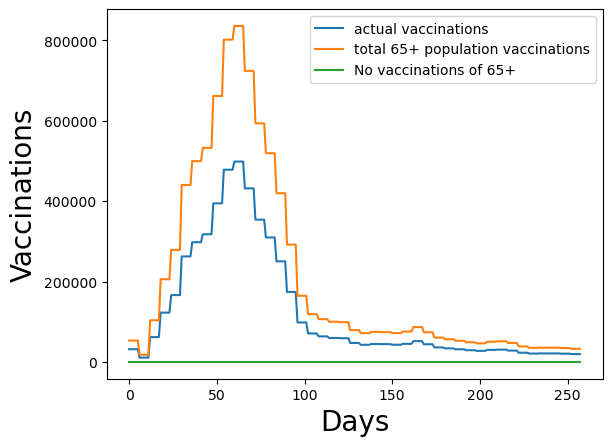

In [7]:
import matplotlib.pyplot as plt

plt.plot(vac1['65+'], label='actual vaccinations')
plt.plot((vac1['65+']*(get_pop(y, data_dem2, '65+')/vac1['65+'].cumsum().iloc[-1])), label='total 65+ population vaccinations')
plt.plot(vac1['65+']*0,label='No vaccinations of 65+')

# set the plot title, x-label, y-label, and legend
#plt.title('65+ vaccination scenario')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Vaccinations', fontsize=20)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# show the plot
plt.show()

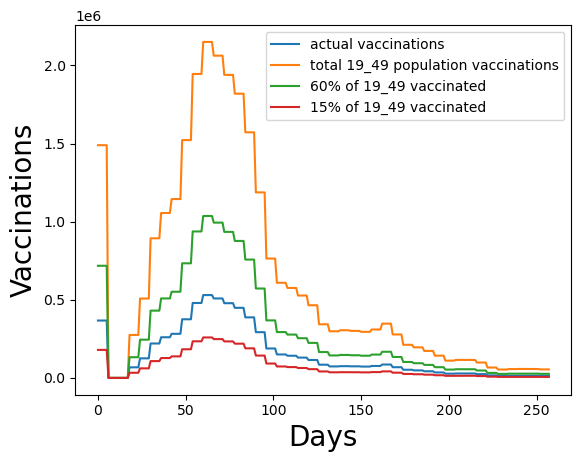

In [8]:
import matplotlib.pyplot as plt

plt.plot(vac1['18_49'], label='actual vaccinations')
plt.plot((vac1['18_49']*(get_pop(y, data_dem2, '19_49')/vac1['65+'].cumsum().iloc[-1])), label='total 19_49 population vaccinations')
plt.plot((vac1['18_49']*(get_pop(y, data_dem2, '19_49')/vac1['18_49'].cumsum().iloc[-1])*0.6),label='60% of 19_49 vaccinated')
plt.plot((vac1['18_49']*(get_pop(y, data_dem2, '19_49')/vac1['18_49'].cumsum().iloc[-1])*0.15),label='15% of 19_49 vaccinated')
# set the plot title, x-label, y-label, and legend
#plt.title('65+ vaccination scenario')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Vaccinations', fontsize=20)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# show the plot
plt.show()

In [9]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [10]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [11]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [12]:
US2 = pd.read_csv('fit_data/' + y + '.csv')
US3 = pd.read_csv('fit_data/' + y + '2.csv')

In [13]:
hosps = US2['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps))

hosp_avg = np.zeros([206, ])
for i in range(206):
    hosp_avg[i] = np.mean(hosps[i:i+7])
    

213


In [14]:
hosps2 = US3['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps2))

hosp_avg2 = np.zeros([263, ])
for i in range(263):
    hosp_avg2[i] = np.mean(hosps2[i:i+7])

270


In [15]:
sum(hosp_avg2)

214915.28571428554

In [20]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [21]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [22]:
vacc_cov = pd.read_csv('cumulative_dose.csv') # This csv file is same as the cumulative_dose_new.csv file in script folder generated using code in vaxx_new.ipynb

In [23]:
Seed = np.zeros([500, 1])
for i in range(0,112):
    Seed[i] = (50/7)*(N/320e6)

In [24]:
def get_sero(state, df2, age):
    df = df2[df2['state'] == state]
    a = df[age]
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [25]:
def set_imm(val):  #ask significance of this # mostly immunity value related
    for i in range(1000):
        fac = 2 + i*0.01
        MM_0 = [fac*0.13, fac*0.04,fac*0.04, fac*0.054, fac*0.13, fac*0.316]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [26]:
facc = 0.144
IHR = [facc*0.25, facc*0.06,facc*0.017, facc*0.025, facc*0.07, facc*0.45]
IRec = [1- facc*0.25, 1- facc*0.06, 1-facc*0.017, 1-facc*0.025, 1-facc*0.07, 1-facc*0.45]

np.sum(np.array(data_dem)*np.array(IHR))/N

0.01784828567863349

In [27]:
faccc = 0.635
HDR = [faccc*0.13, faccc*0.04,faccc*0.04, faccc*0.054, faccc*0.13, faccc*0.316]
HDRec = [1- faccc*0.13, 1- faccc*0.04, 1-faccc*0.04, 1-faccc*0.054, 1-faccc*0.13, 1-faccc*0.316]

np.sum(np.array(data_dem)*np.array(HDR))/N

0.07351281245947526

In [28]:
fac2 = 0.5

M2_0 = [0.01*get_sero(state, vacc_cov, '0_4'), 0.01*get_sero(state, vacc_cov, '5_12'), 0.01*get_sero(state, vacc_cov, '13_17'), 0.01*get_sero(state, vacc_cov, '18_49'), 0.01*get_sero(state, vacc_cov, '50_64') , 0.01*get_sero(state, vacc_cov, '65+')]
np.sum(np.array(data_dem)*np.array(M2_0))/N
M2_0

[0.605205004479159,
 0.5315576625144273,
 0.4570305293129691,
 0.32894712286357547,
 0.4630057221634845,
 0.6616130905160681]

In [29]:
g_E = 1/(2)
g_hosp = 1/6
q = 2/3
Ni = data_dem

g_Recovery = 1/4
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [30]:
flu_age = pd.read_csv('FluSurveillance_Custom_Download_Data.csv', usecols = ['MMWR-YEAR','MMWR-WEEK','AGE CATEGORY','CUMULATIVE RATE','WEEKLY RATE '])
flu_age_04=flu_age[flu_age['AGE CATEGORY'] == '0-4 yr']
flu_age_511=flu_age[flu_age['AGE CATEGORY'] == '5-11  yr']
flu_age_1217=flu_age[flu_age['AGE CATEGORY'] == '12-17 yr']
flu_age_1849=flu_age[flu_age['AGE CATEGORY'] == '18-49 yr']
flu_age_5064=flu_age[flu_age['AGE CATEGORY'] == '50-64 yr']
flu_age_65=flu_age[flu_age['AGE CATEGORY'] == '65+ yr']

flu_age_04_array=flu_age_04['CUMULATIVE RATE'].to_numpy()
flu_age_511_array=flu_age_511['CUMULATIVE RATE'].to_numpy()
flu_age_1217_array=flu_age_1217['CUMULATIVE RATE'].to_numpy()
flu_age_1849_array=flu_age_1849['CUMULATIVE RATE'].to_numpy()
flu_age_5064_array=flu_age_5064['CUMULATIVE RATE'].to_numpy()
flu_age_65_array=flu_age_65['CUMULATIVE RATE'].to_numpy()

In [31]:
Hum_fit = pd.read_csv('abs_hum_fit.csv')
Hum_365=Hum_fit['humidity'].to_numpy()

In [32]:
from statistics import mean 
def cal_hum(length, start_date, magnitude):
    hum_final=np.zeros([length, 1])
    for i in range(len(hum_final)):
        j=(i+start_date)%365
        hum_final[i]=1+((mean(Hum_365)-Hum_365[j])/(max(Hum_365)-mean(Hum_365)))*magnitude

    return hum_final

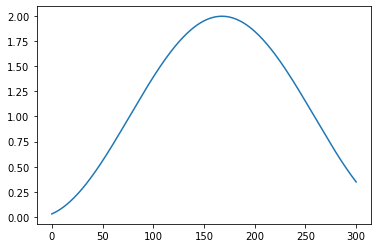

In [33]:
cc=cal_hum(365, 0, 1)
zz2=cal_hum(301, 218, 1)
plt.plot(zz2)

In [206]:
def sim_hospA(x, x0, x1, x2, x3,mag,ratio1,ratio2,ratio3):
    Nd = 270  # earlier it was 102 as 102 enteries in fitdata set, now we have 213 eneteries
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(0.33)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio3*x1]
    H0 = [ratio1*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio3*x3]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]
        zx = 1
        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        

        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] + g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i] + zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] - g_E*E1[i])  + E1_g
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp1))*H1[i] - g_hosp*HDRec[i]*H1[i]) + H1_g    
            R1_new[i] = R1[i] + dt*( g_hosp*HDRec[i]*H1[i] + g_Recovery*IRec[i]*I1[i] - ww*R1[i]) + R1_g
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
            if (count <= 480):
                    
                vacc_ref = vacc_1
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; 
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
    return H_ov_avg

In [207]:
def simulation_st1(x):
    Nd = 301# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(0.33)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio2*x1,ratio3*x1]
    H0 = [ratio1*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio2*x3,ratio3*x3]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]
        zx = 1
        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        

        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] + g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i] + zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] - g_E*E1[i])  + E1_g
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp1))*H1[i] - g_hosp*HDRec[i]*H1[i]) + H1_g    
            R1_new[i] = R1[i] + dt*( g_hosp*HDRec[i]*H1[i] + g_Recovery*IRec[i]*I1[i] - ww*R1[i]) + R1_g
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
            if (count <= 480):
                    
                vacc_ref = vacc_1
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; 
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [208]:


# 0 for baseline, 1 for boost 1 and 2 for boost 2


cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 7/N            #15/N

k3 = 3/N           #250/N
M_0 = M2_0

x0, mag, x1, x2, x3 = 1, 1, 1, 1, 1
z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 0
y0, y1, y2, y3,y4, y6 = 50, 50, 50, 50, 50,  2
ratio1,ratio2,ratio3=1,1,1

In [209]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]

In [210]:
import os
os.makedirs('fit_param_new_May2023/'+state+'', exist_ok=True)

In [211]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [212]:
xdata = np.linspace(0, 263, 263)
ydata = hosp_avg2


In [213]:
popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.005*N,0.0005*N, 0.0005*N, 0.00000153*N, 0.5, 1, 1,1], bounds = ([0.0*N,0.0*N,0.0*N,0.0*N, 0, 0, 0, 0], [1*N, 0.02*N, 0.02*N, 0.0002*N, 1, 10, 10, 10]))
print(popt)
print('haw')  
x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 = popt[0], popt[1], popt[2], popt[3],popt[4], popt[5], popt[6],popt[7]

I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st1(0)
print(x0/N)
print(mag)

[1.71438623e+07 2.29207399e+03 2.40590611e+04 1.17140566e+04
 1.19638728e-06 2.90158949e-06 2.29984062e-07 1.75885008e-01]
haw
0.053700497306087586
1.1963872760534456e-06


In [214]:
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avgb0,H_ov_avgb1,H_ov_avgb2,H_ov_avgb3,H_ov_avgb4,H_ov_avgb5 = simulation_st1(0)
# H_ov_avg0 is same as H_ov_avgb0 similialry for the 1, 2..5


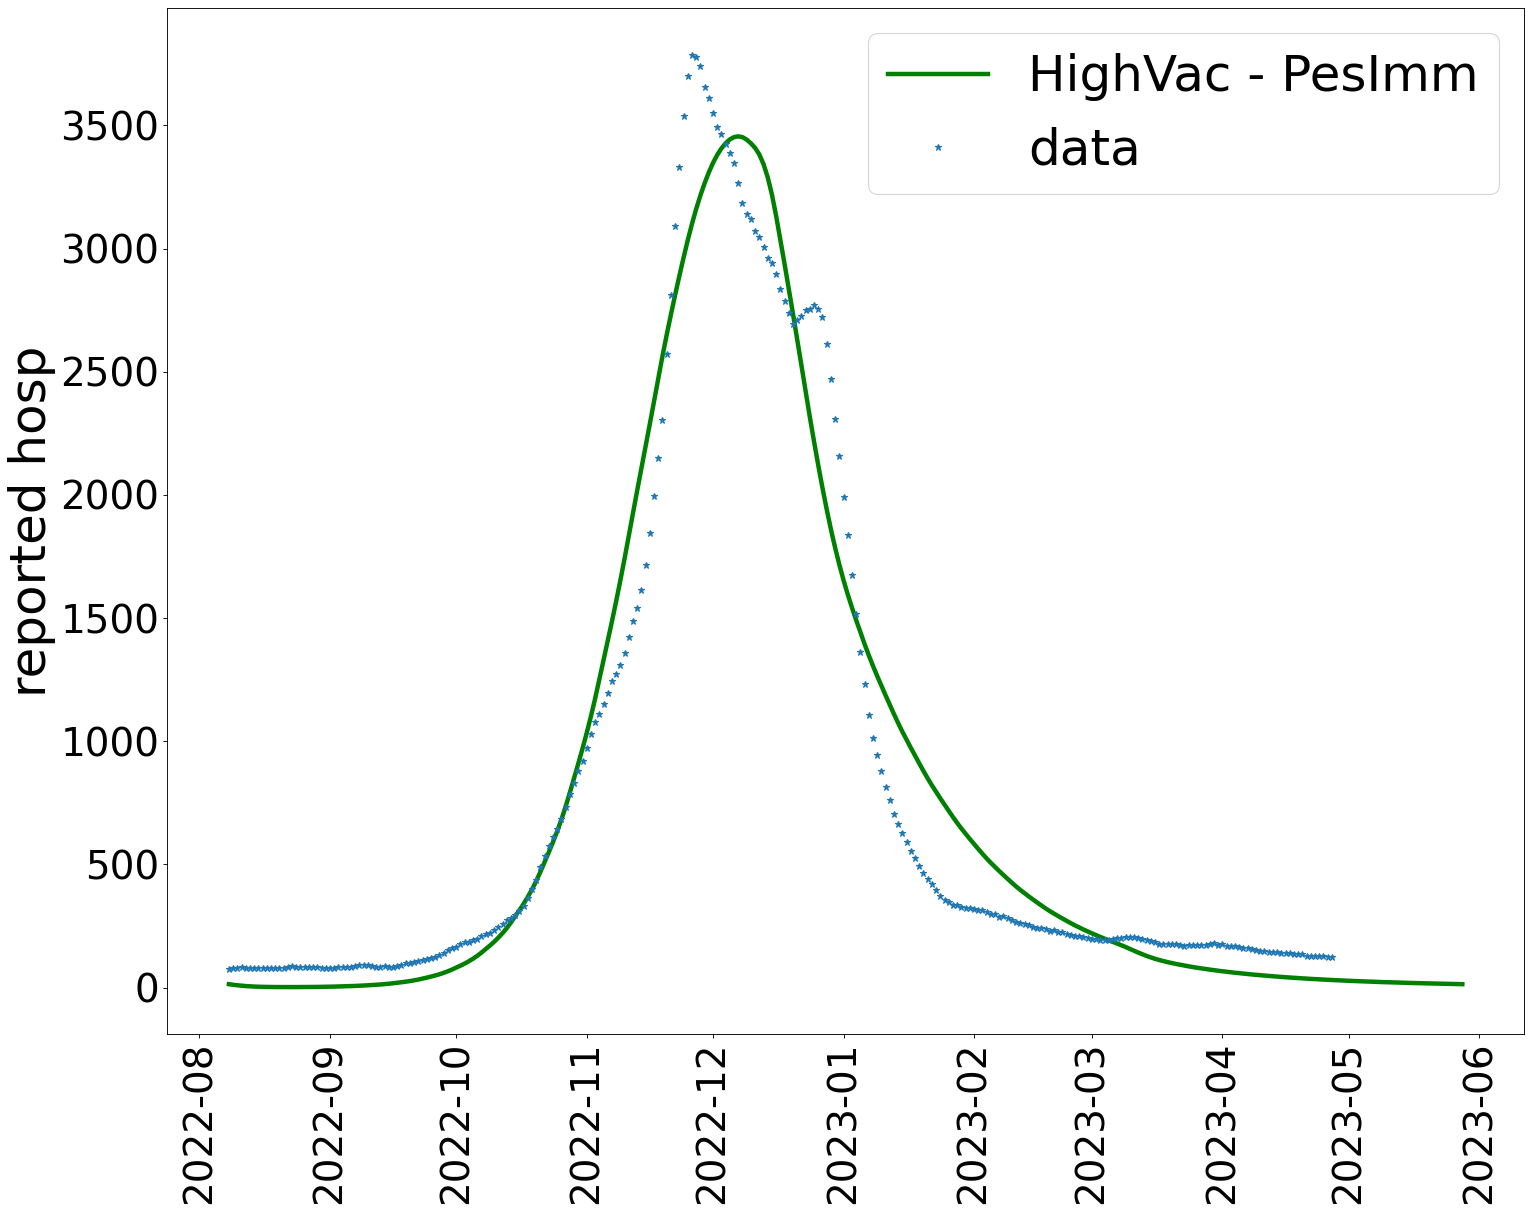

In [215]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
drange3 = pd.date_range("2022-08-08", periods=263, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')
#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
#fig, ax = plt.subplots()
#plt_1 = plt.figure(figsize=(20, 16))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'g', label = 'HighVac - PesImm', lw =4)
#plt.plot(drange1, H_ov_avg1, 'b', label = 'low - opt', lw =4)

#plt.plot(drange1, H_ov_avg2, 'r', label = 'high - pes', lw =4)
#plt.plot(drange1, H_ov_avg3, 'gray', label = 'low - pes', lw =4)


plt.plot(drange3, hosp_avg2, '*', label = 'data', lw =4)


#plt.plot(drange3, vacc_2[2,:])
#plt.plot(drange3, vacc_3[2,:])
#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)

#plt.axis([19100, 19185, 0, 0.2e6])
plt.ylabel('reported hosp', fontsize = 45)

plt.legend(fontsize = 45)
plt.tight_layout()
#plt.savefig('fitus hosp')

In [216]:
cum_hosp_fit0 = np.zeros([233])
cum_hosp_fit1 = np.zeros([233])
cum_hosp_fit2 = np.zeros([233])
cum_hosp_fit3 = np.zeros([233])
cum_hosp_fit4 = np.zeros([233])
cum_hosp_fit5 = np.zeros([233])
for i in range(1,233):
    cum_hosp_fit0[i] = cum_hosp_fit0[i-1] + (H_ov_avgb0[i+61]/data_dem[0])*100000
    cum_hosp_fit1[i] = cum_hosp_fit1[i-1] + (H_ov_avgb1[i+61]/data_dem[1])*100000
    cum_hosp_fit2[i] = cum_hosp_fit2[i-1] + (H_ov_avgb2[i+61]/data_dem[2])*100000
    cum_hosp_fit3[i] = cum_hosp_fit3[i-1] + (H_ov_avgb3[i+61]/data_dem[3])*100000
    cum_hosp_fit4[i] = cum_hosp_fit4[i-1] + (H_ov_avgb4[i+61]/data_dem[4])*100000
    cum_hosp_fit5[i] = cum_hosp_fit5[i-1] + (H_ov_avgb5[i+61]/data_dem[5])*100000

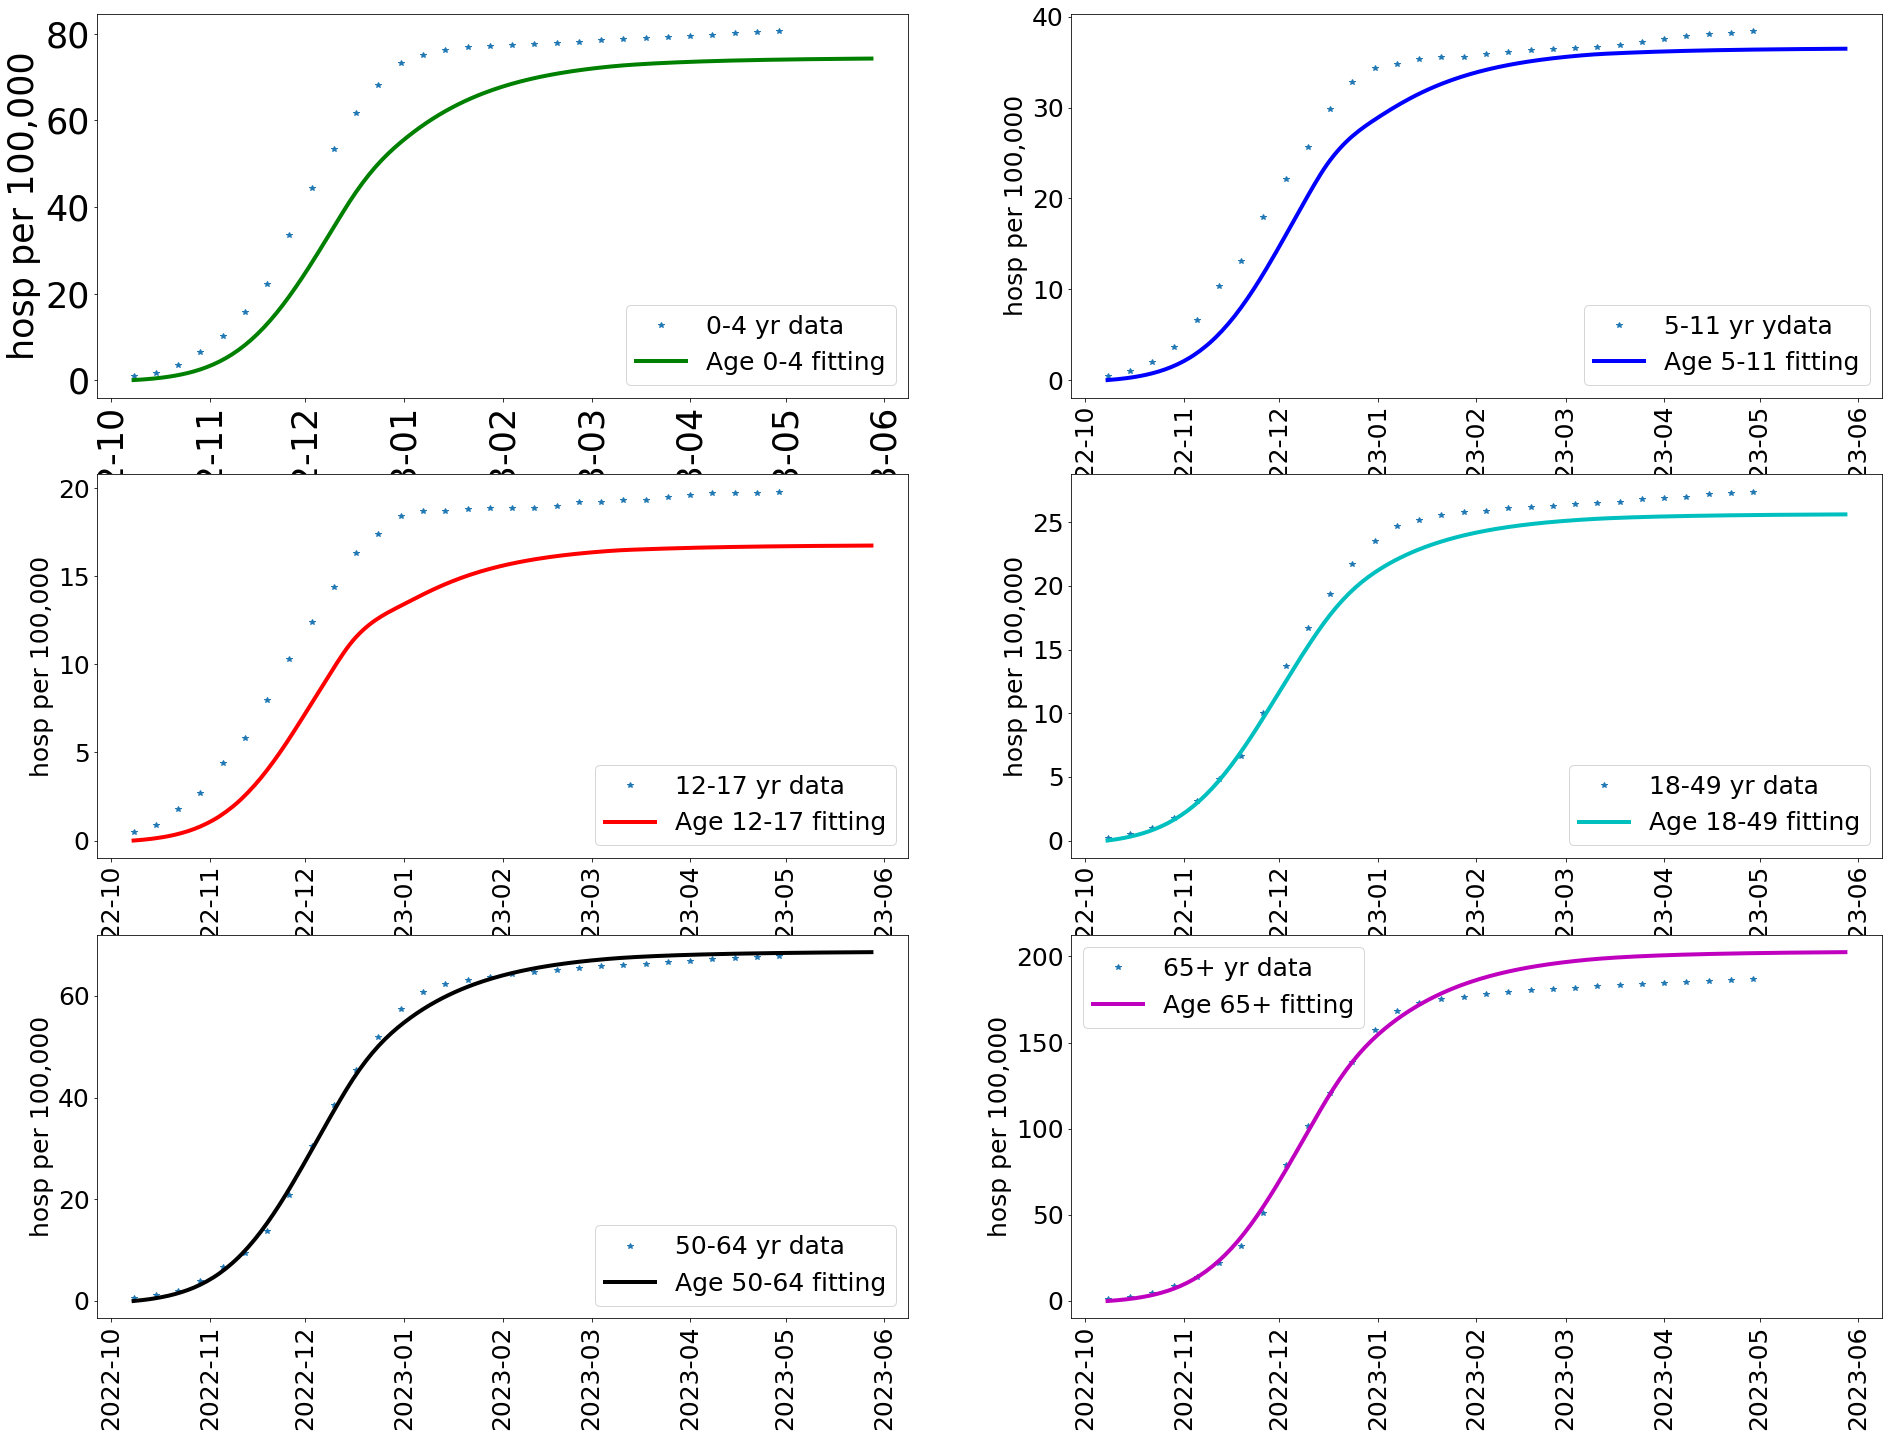

In [217]:
fig = plt.figure(figsize=(32, 24))
drange1 = pd.date_range("2022-10-08", periods=30, freq="7D")
drange2 = pd.date_range("2022-10-08", periods=233, freq="1D")

plt.subplot(3, 2, 1)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_04_array, '*', label = '0-4 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit0,'g', label = 'Age 0-4 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 2)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_511_array, '*', label = '5-11 yr ydata', lw =20)
plt.plot(drange2, cum_hosp_fit1,'b', label = 'Age 5-11 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 3)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1217_array, '*', label = '12-17 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit2,'r', label = 'Age 12-17 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 4)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1849_array, '*', label = '18-49 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit3,'c', label = 'Age 18-49 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()


plt.subplot(3, 2, 5)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_5064_array, '*', label = '50-64 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit4,'k', label = 'Age 50-64 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 6)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_65_array, '*', label = '65+ yr data', lw =20)
plt.plot(drange2, cum_hosp_fit5,'m', label = 'Age 65+ fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.show()

In [59]:
def simulation_st(x, popt, sc1, sc2, sc3):
    
    x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8],  popt[9]
    Nd = 301# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    H = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    
    if (sc2 == 'optImm'):
        M3_0 = set_imm(0.33)
    if (sc2 == 'pesImm'):
        M3_0 = set_imm(0.33)
    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
    
    peak_H = 0
    peak_d_H = 0
    peak_D = 0
    peak_d_D = 0
  
    sigma = 0.000  #0.005
    
    #np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(6)]
    I_0 = [x1 for n in range(6)]
    H0 = [x3/6 for n in range(6)]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        if (sc1 == "highVac"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "lowVac"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp

        zx = 1
        if (tt*dt  < 31):
            bita = (x0 + (tt*dt)*(x01 - x0)/30)/N
            #zx = z0 + (tt*dt)*(z1 - z0)/30
            
        if (tt*dt >= 31 and tt*dt < 61):
            sigma = 0.006
            bita = (x01 + (tt*dt - 30)*(x02 - x01)/30)/N
            #zx = z1 + (tt*dt-31)*(z2 - z1)/30


        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.006
            bita = (x02 + (tt*dt - 60)*(x03 - x02)/30)/N
            #zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.006
            bita = (x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            #zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.006
            bita = (x04 + (tt*dt - 120)*(x05 - x04)/30)/N
            #zx = z2 + (tt*dt-61)*(z3 - z2)/30
            
        if (tt*dt >= 151 and tt*dt < 206):
            sigma = 0.006
            bita = (x05 + (tt*dt - 150)*(x06 - x05)/55)/N
            #zx = z2 + (tt*dt-61)*(z3 - z2)/30


        if (tt*dt >= 206):
            if (sc2 == "pesImm"):
                bita = x06/N   
            else:
                bita = x06/N  

 
                
        #if (tt*dt >= 320):
           # if (sc2 == "pesImm"):
               # bita = max((1.25*x03 + (tt*dt - 320)*(x03 - 1.25*x03)/30)/N , x03/N)
            #else:
                #bita = max((1.25*x03 + (tt*dt - 320)*(x03 - 1.25*x03)/30)/N , x03/N)          
                                
            #zx = z3 


            
        CM = CM_all
        if (count <= 470):
            if (school[count] == 0):
                CM = CM - CM_s

            if (work[count] == 0):
                CM = CM - CM_w - CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
        Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        

        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] + g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i] + zx*HDR[i]*g_hosp/(1 + prot_hosp1)*H1[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1, Ni)*S[i] - g_E*E1[i])  + E1_g
            I1_new[i] = I1[i] + dt*(Seed[tt]*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            H1_new[i] = H1[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp1))*I1[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp1))*H1[i] - g_hosp*HDRec[i]*H1[i]) + H1_g    
            R1_new[i] = R1[i] + dt*( g_hosp*HDRec[i]*H1[i] + g_Recovery*IRec[i]*I1[i] - ww*R1[i]) + R1_g
            #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
        
        
                
            if (count <= 480):
                  
                if (sc3 == "vacc_normal"):
                    vacc_ref = vacc_1
                if (sc3 == "vacc_60"):
                    vacc_ref = vacc_2
                if (sc3 == "vacc_80"):
                    vacc_ref = vacc_3
                if (sc3 == "vacc_120"):
                    vacc_ref = vacc_4
                if (sc3 == "vacc_140"):
                    vacc_ref = vacc_5
                if (sc3 == "vacc_65+_100"):
                    vacc_ref = vacc_6
                if (sc3 == "vacc_50_64_100"):
                    vacc_ref = vacc_7
                if (sc3 == "vacc_19_49_100"):
                    vacc_ref = vacc_8
                if (sc3 == "vacc_0_18_100"):
                    vacc_ref = vacc_9
                if (sc3 == "vacc_65+_0"):
                    vacc_ref = vacc_10
                if (sc3 == "vacc_19_49_15"):
                    vacc_ref = vacc_11
                if (sc3 == "vacc_19_49_60"):
                    vacc_ref = vacc_12
                if (sc3 == "vacc_50_64_25"):
                    vacc_ref = vacc_13 
                if (sc3 == "vacc_0_18_20"):
                    vacc_ref = vacc_14
                if (sc3 == "vacc_50_65+_100"):
                    vacc_ref = vacc_15
                if (sc3 == "vacc_50_65+_0"):
                    vacc_ref = vacc_16
                if (sc3 == "vacc_50_65+_25"):
                    vacc_ref = vacc_17
                if (sc3 == "vacc_50_65+_75"):
                    vacc_ref = vacc_18
                if (sc3 == "vacc_19_49_0"):
                    vacc_ref = vacc_19
                if (sc3 == "vacc_0_18_0"):
                    vacc_ref = vacc_20
                if (sc3 == "vacc_0_18_70"):
                    vacc_ref = vacc_21
                if (sc3 == "vacc_65+_100R0"):
                    vacc_ref = vacc_22
                if (sc3 == "vacc_19_49_100R0"):
                    vacc_ref = vacc_23
                if (sc3 == "vacc_0_18_100R0"):
                    vacc_ref = vacc_24
                if (sc3 == "vacc_all_0"):
                    vacc_ref = vacc_25

                
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
          
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new;
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
               # prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
                
           
        
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        

    peak_H = np.max(H_ov_avg)
    peak_D = np.max(H_ov_avg)
    
    for i in range(Nd-7):
        if (H_ov_avg[i] == peak_H):
            peak_d_H = i
            
        if (D_ov_avg[i] == peak_D):
            peak_d_D = i  
  

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5
    #return H_ov_avg

In [60]:
np.random.seed(100)
sc1 = 'highVac'
sc2 = 'pesImm'
sc3 = 'vacc_19_49_100'
M_19_49=simulation_st(0, popt, sc1, sc2, sc3)

In [65]:
#M_19_49_2

In [66]:
#M_19_49

In [61]:
def sim_scenario(scen):
    Nsim = 25
    popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.0002*N]))
  
   #x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8], popt[9]

    if (scen == "A"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_60"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "B"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_80"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospB, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
        
    if (scen == "C"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_120"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospC, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "D"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_140"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospD, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
    if (scen == "E"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_65+_100"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "F"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_64_100"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "G"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_19_49_100"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "H"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_0_18_100"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "I"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_65+_0" 
        print('scenario ',scen, 'loaded') 
        
    if (scen == "J"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_19_49_15"
        print('scenario ',scen, 'loaded') 
    
    if (scen == "K"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_19_49_60"
        print('scenario ',scen, 'loaded') 
    
    if (scen == "L"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_64_25"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "M"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_0_18_20"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "N"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_65+_100"
        print('scenario ',scen, 'loaded') 
    
    if (scen == "O"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_65+_0"
        print('scenario ',scen, 'loaded') 
    
    if (scen == "P"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_65+_25"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "Q"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_50_65+_75"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "R"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_19_49_0"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "S"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_0_18_0"
        print('scenario ',scen, 'loaded')
    
    if (scen == "T"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_0_18_70"
        print('scenario ',scen, 'loaded')
        
    if (scen == "T1"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_65+_100R0"
        print('scenario ',scen, 'loaded')
        
    if (scen == "T2"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_19_49_100R0"
        print('scenario ',scen, 'loaded')
        
    if (scen == "T3"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_0_18_100R0"
        print('scenario ',scen, 'loaded')
        
    if (scen == "T4"):
        sc1 = "highVac"
        sc2 = "pesImm"
        sc3 = "vacc_all_0"
        

    print('fitting completed')         
    new_hosp = np.zeros([294, Nsim])
    new_death = np.zeros([294, Nsim])
    
    new_peak_H = np.zeros([294, Nsim])
    new_peak_D = np.zeros([294, Nsim])
    
    new_peak_d_H = np.zeros([294, Nsim])
    new_peak_d_D = np.zeros([294, Nsim])
    
    new_hosp0 = np.zeros([294, Nsim])
    new_hosp1 = np.zeros([294, Nsim])
    new_hosp2 = np.zeros([294, Nsim])
    new_hosp3 = np.zeros([294, Nsim])
    new_hosp4 = np.zeros([294, Nsim])
    new_hosp5 = np.zeros([294, Nsim])

    for i in range(Nsim):
        np.random.seed(i+5)
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st(0, popt, sc1, sc2, sc3)
        
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg
        
        new_peak_H[:,i] = peak_H
        new_peak_D[:,i] = peak_D

        new_peak_d_H[:,i] = peak_d_H
        new_peak_d_D[:,i] = peak_d_D
        
        new_hosp0[:,i] = H_ov_avg0
        new_hosp1[:,i] = H_ov_avg1
        new_hosp2[:,i] = H_ov_avg2
        new_hosp3[:,i] = H_ov_avg3
        new_hosp4[:,i] = H_ov_avg4
        new_hosp5[:,i] = H_ov_avg5
               

    print("computing percentiles for, ", scen)
    new_hosp_p = np.zeros([294, 25]) ## 301-7 
    new_death_p = np.zeros([294, 25])
    
    new_peak_H_p = np.zeros([294, 25])
    new_peak_D_p = np.zeros([294, 25])
    
    new_peak_d_H_p = np.zeros([294, 25])
    new_peak_d_D_p = np.zeros([294, 25])
    
    new_hosp_p0 = np.zeros([294, 25]) ## 301-7
    new_hosp_p1 = np.zeros([294, 25]) ## 301-7
    new_hosp_p2 = np.zeros([294, 25]) ## 301-7
    new_hosp_p3 = np.zeros([294, 25]) ## 301-7
    new_hosp_p4 = np.zeros([294, 25]) ## 301-7
    new_hosp_p5 = np.zeros([294, 25]) ## 301-7

    

    for i in range(294):
        #new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        #new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])                                
        new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_D_p[i,:] = np.percentile(new_peak_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
         
        #new_peak_d_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_peak_d_H_p[i,:] = np.percentile(new_peak_d_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_d_D_p[i,:] = np.percentile(new_peak_d_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        
        new_hosp_p0[i,:] = np.percentile(new_hosp0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        
    return new_hosp_p, new_death_p, new_peak_H_p, new_peak_D_p, new_peak_d_H_p, new_peak_d_D_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5
    #return new_hosp_p, new_peak_H_p, new_peak_d_H_p


In [62]:
xdata = np.linspace(0, 206, 206)
ydata = hosp_avg
new_hosp_p_A, new_death_p_A, new_peak_H_p_A, new_peak_D_p_A, new_peak_d_H_p_A, new_peak_d_D_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A = sim_scenario('A')
new_hosp_p_B, new_death_p_B, new_peak_H_p_B, new_peak_D_p_B, new_peak_d_H_p_B, new_peak_d_D_p_B ,new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B = sim_scenario('B')
new_hosp_p_C, new_death_p_C, new_peak_H_p_C, new_peak_D_p_C, new_peak_d_H_p_C, new_peak_d_D_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C = sim_scenario('C')
new_hosp_p_D, new_death_p_D, new_peak_H_p_D, new_peak_D_p_D, new_peak_d_H_p_D, new_peak_d_D_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D = sim_scenario('D')
new_hosp_p_T4, new_death_p_T4, new_peak_H_p_T4, new_peak_D_p_T4, new_peak_d_H_p_T4, new_peak_d_D_p_T4, new_hosp_p0_T4, new_hosp_p1_T4, new_hosp_p2_T4, new_hosp_p3_T4, new_hosp_p4_T4, new_hosp_p5_T4 = sim_scenario('T4')


scenario  A loaded
fitting completed
computing percentiles for,  A
scenario  B loaded
fitting completed
computing percentiles for,  B
scenario  C loaded
fitting completed
computing percentiles for,  C
scenario  D loaded
fitting completed
computing percentiles for,  D
fitting completed
computing percentiles for,  T4


In [69]:
#new_hosp_p_E, new_death_p_E, new_peak_H_p_E, new_peak_D_p_E, new_peak_d_H_p_E, new_peak_d_D_p_E = sim_scenario('E')
#new_hosp_p_F, new_death_p_F, new_peak_H_p_F, new_peak_D_p_F, new_peak_d_H_p_F, new_peak_d_D_p_F = sim_scenario('F')
new_hosp_p_G, new_death_p_G, new_peak_H_p_G, new_peak_D_p_G, new_peak_d_H_p_G, new_peak_d_D_p_G, new_hosp_p0_G, new_hosp_p1_G, new_hosp_p2_G, new_hosp_p3_G, new_hosp_p4_G, new_hosp_p5_G  = sim_scenario('G')#19_49 100%
new_hosp_p_H, new_death_p_H, new_peak_H_p_H, new_peak_D_p_H, new_peak_d_H_p_H, new_peak_d_D_p_H, new_hosp_p0_H, new_hosp_p1_H, new_hosp_p2_H, new_hosp_p3_H, new_hosp_p4_H, new_hosp_p5_H  = sim_scenario('H')#0_18 100%
#new_hosp_p_I, new_death_p_I, new_peak_H_p_I, new_peak_D_p_I, new_peak_d_H_p_I, new_peak_d_D_p_I = sim_scenario('I')
new_hosp_p_J, new_death_p_J, new_peak_H_p_J, new_peak_D_p_J, new_peak_d_H_p_J, new_peak_d_D_p_J, new_hosp_p0_J, new_hosp_p1_J, new_hosp_p2_J, new_hosp_p3_J, new_hosp_p4_J, new_hosp_p5_J = sim_scenario('J')#19_49 15%
new_hosp_p_K, new_death_p_K, new_peak_H_p_K, new_peak_D_p_K, new_peak_d_H_p_K, new_peak_d_D_p_K, new_hosp_p0_K, new_hosp_p1_K, new_hosp_p2_K, new_hosp_p3_K, new_hosp_p4_K, new_hosp_p5_K = sim_scenario('K')#19_49 60%
#new_hosp_p_L, new_death_p_L, new_peak_H_p_L, new_peak_D_p_L, new_peak_d_H_p_L, new_peak_d_D_p_L = sim_scenario('L')
new_hosp_p_M, new_death_p_M, new_peak_H_p_M, new_peak_D_p_M, new_peak_d_H_p_M, new_peak_d_D_p_M, new_hosp_p0_M, new_hosp_p1_M, new_hosp_p2_M, new_hosp_p3_M, new_hosp_p4_M, new_hosp_p5_M = sim_scenario('M')# 0_18 20%
new_hosp_p_N, new_death_p_N, new_peak_H_p_N, new_peak_D_p_N, new_peak_d_H_p_N, new_peak_d_D_p_N, new_hosp_p0_N, new_hosp_p1_N, new_hosp_p2_N, new_hosp_p3_N, new_hosp_p4_N, new_hosp_p5_N = sim_scenario('N')# 50_65+ 100%
new_hosp_p_O, new_death_p_O, new_peak_H_p_O, new_peak_D_p_O, new_peak_d_H_p_O, new_peak_d_D_p_O, new_hosp_p0_O, new_hosp_p1_O, new_hosp_p2_O, new_hosp_p3_O, new_hosp_p4_O, new_hosp_p5_O = sim_scenario('O')# 50_65+ 0%
new_hosp_p_P, new_death_p_P, new_peak_H_p_P, new_peak_D_p_P, new_peak_d_H_p_P, new_peak_d_D_p_P, new_hosp_p0_P, new_hosp_p1_P, new_hosp_p2_P, new_hosp_p3_P, new_hosp_p4_P, new_hosp_p5_P = sim_scenario('P')# 50_65+ 25%
new_hosp_p_Q, new_death_p_Q, new_peak_H_p_Q, new_peak_D_p_Q, new_peak_d_H_p_Q, new_peak_d_D_p_Q, new_hosp_p0_Q, new_hosp_p1_Q, new_hosp_p2_Q, new_hosp_p3_Q, new_hosp_p4_Q, new_hosp_p5_Q = sim_scenario('Q')# 50_65+ 75%
new_hosp_p_R, new_death_p_R, new_peak_H_p_R, new_peak_D_p_R, new_peak_d_H_p_R, new_peak_d_D_p_R, new_hosp_p0_R, new_hosp_p1_R, new_hosp_p2_R, new_hosp_p3_R, new_hosp_p4_R, new_hosp_p5_R = sim_scenario('R')# 19_49 0%
new_hosp_p_S, new_death_p_S, new_peak_H_p_S, new_peak_D_p_S, new_peak_d_H_p_S, new_peak_d_D_p_S, new_hosp_p0_S, new_hosp_p1_S, new_hosp_p2_S, new_hosp_p3_S, new_hosp_p4_S, new_hosp_p5_S = sim_scenario('S')# 0_18 0%
new_hosp_p_T, new_death_p_T, new_peak_H_p_T, new_peak_D_p_T, new_peak_d_H_p_T, new_peak_d_D_p_T, new_hosp_p0_T, new_hosp_p1_T, new_hosp_p2_T, new_hosp_p3_T, new_hosp_p4_T, new_hosp_p5_T = sim_scenario('T')# 0_18 70%

scenario  G loaded
fitting completed
computing percentiles for,  G
scenario  H loaded
fitting completed
computing percentiles for,  H
scenario  J loaded
fitting completed
computing percentiles for,  J
scenario  K loaded
fitting completed
computing percentiles for,  K
scenario  M loaded
fitting completed
computing percentiles for,  M
scenario  N loaded
fitting completed
computing percentiles for,  N
scenario  O loaded
fitting completed
computing percentiles for,  O
scenario  P loaded
fitting completed
computing percentiles for,  P
scenario  Q loaded
fitting completed
computing percentiles for,  Q
scenario  R loaded
fitting completed
computing percentiles for,  R
scenario  S loaded
fitting completed
computing percentiles for,  S
scenario  T loaded
fitting completed
computing percentiles for,  T


In [118]:
# 50+ only, 19_49 only, 0_18 only 100 rest zeo all zero scenarios 
new_hosp_p_T1, new_death_p_T1, new_peak_H_p_T1, new_peak_D_p_T1, new_peak_d_H_p_T1, new_peak_d_D_p_T1, new_hosp_p0_T1, new_hosp_p1_T1, new_hosp_p2_T1, new_hosp_p3_T1, new_hosp_p4_T1, new_hosp_p5_T1 = sim_scenario('T1')
new_hosp_p_T2, new_death_p_T2, new_peak_H_p_T2, new_peak_D_p_T2, new_peak_d_H_p_T2, new_peak_d_D_p_T2, new_hosp_p0_T2, new_hosp_p1_T2, new_hosp_p2_T2, new_hosp_p3_T2, new_hosp_p4_T2, new_hosp_p5_T2 = sim_scenario('T2')
new_hosp_p_T3, new_death_p_T3, new_peak_H_p_T3, new_peak_D_p_T3, new_peak_d_H_p_T3, new_peak_d_D_p_T3, new_hosp_p0_T3, new_hosp_p1_T3, new_hosp_p2_T3, new_hosp_p3_T3, new_hosp_p4_T3, new_hosp_p5_T3 = sim_scenario('T3')
new_hosp_p_T4, new_death_p_T4, new_peak_H_p_T4, new_peak_D_p_T4, new_peak_d_H_p_T4, new_peak_d_D_p_T4, new_hosp_p0_T4, new_hosp_p1_T4, new_hosp_p2_T4, new_hosp_p3_T4, new_hosp_p4_T4, new_hosp_p5_T4 = sim_scenario('T4')


scenario  T1 loaded
fitting completed
computing percentiles for,  T1
scenario  T2 loaded
fitting completed
computing percentiles for,  T2
scenario  T3 loaded
fitting completed
computing percentiles for,  T3
fitting completed
computing percentiles for,  T4


In [60]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]
np.savetxt('fit_param_new_May2023/'+state+'/popt.csv', popt, delimiter=',')
#np.savetxt('fit_param_new_May2023/'+state+'/popt2.csv', popt2, delimiter=',')
#np.savetxt('fit_param_new_May2023/'+state+'/popt3.csv', popt3, delimiter=',')
np.savetxt('fit_param_new_May2023/'+state+'/param.csv', Save_par, delimiter=',')
np.savetxt('fit_param_new_May2023/'+state+'/M2_0.csv', M2_0, delimiter=',')
#np.savetxt('fit_param_new_May2023/'+state+'/M22_0.csv', M22_0, delimiter=',')
np.savetxt('fit_param_new_May2023/'+state+'/M3_0.csv', M3_0, delimiter=',')


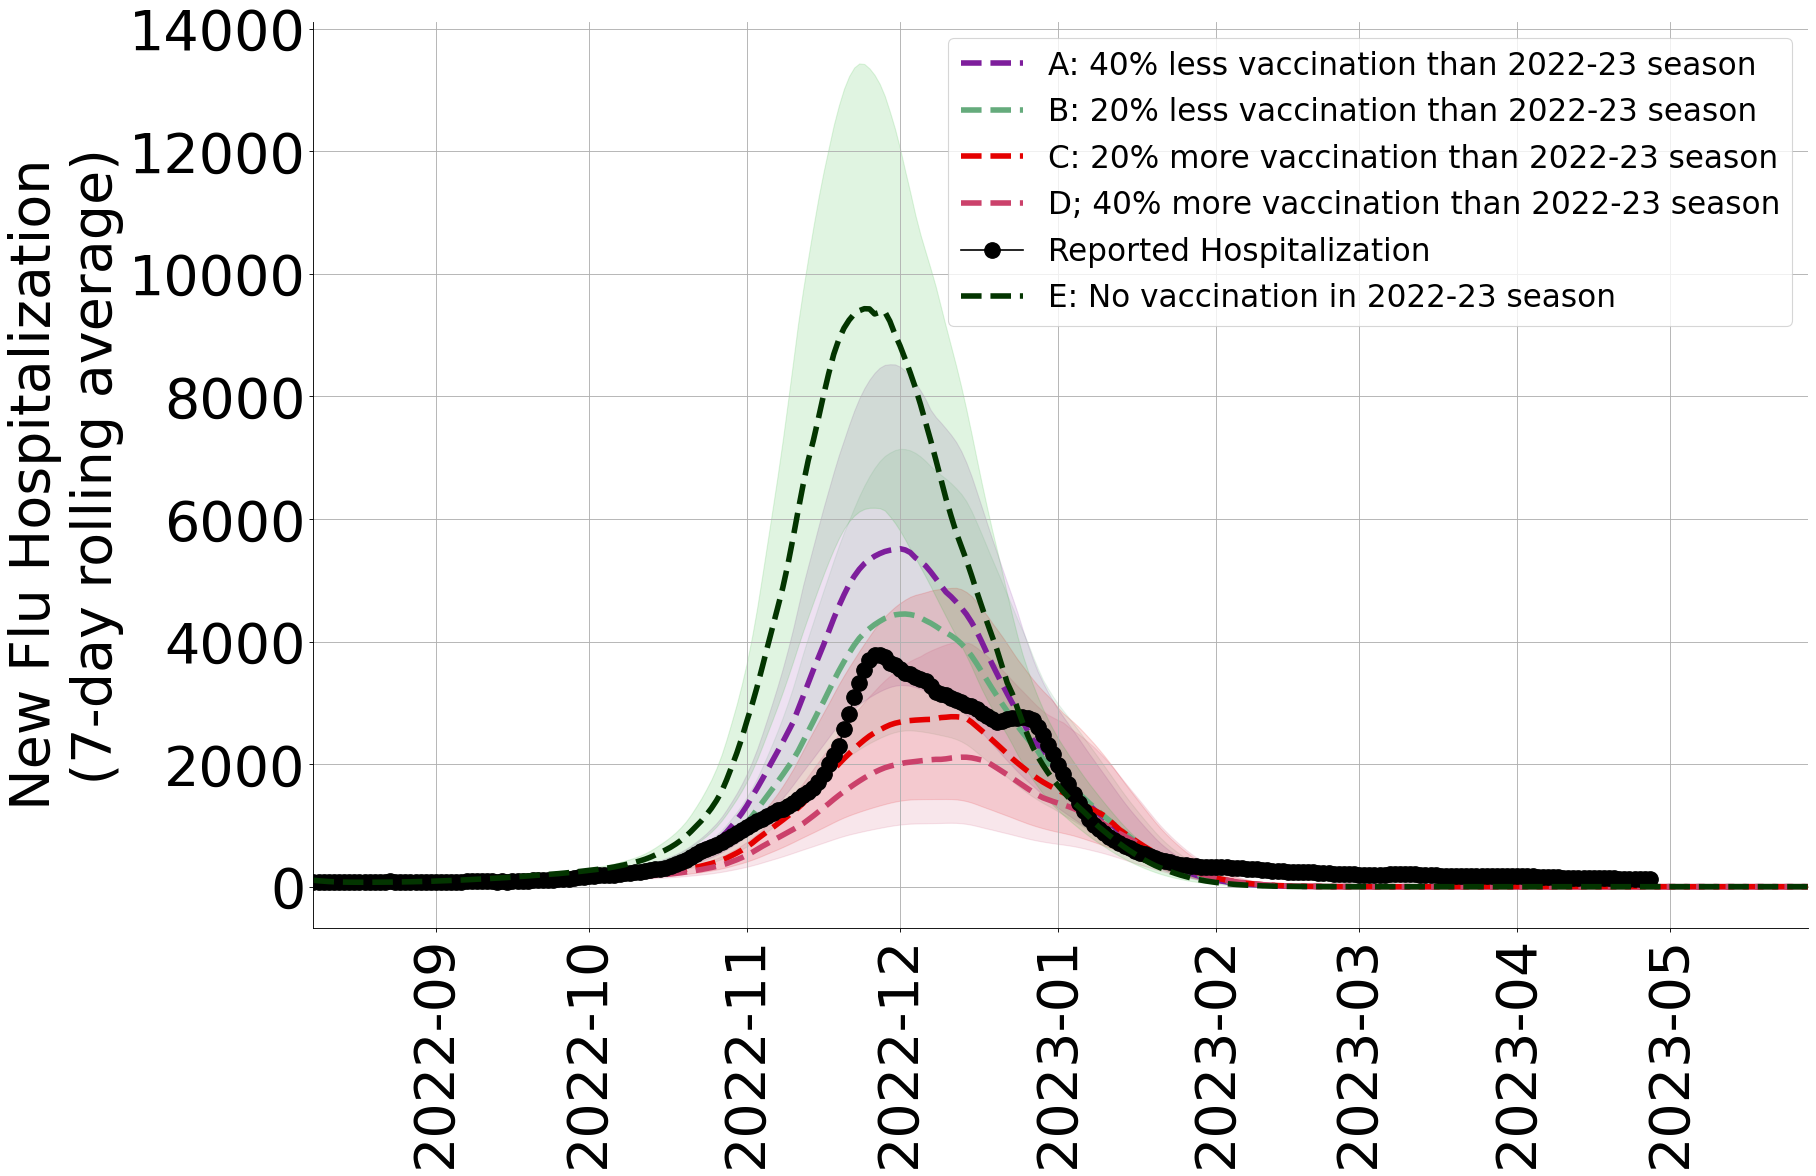

In [77]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-08-08", periods=263, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination than 2022-23 season')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination than 2022-23 season')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination than 2022-23 season')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination than 2022-23 season')


plt.plot(drange3, hosp_avg2, 'k-o', markersize=14,label = 'Reported Hospitalization')

plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')


plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('New Flu Hospitalization \n (7-day rolling average)')
plt.legend(fontsize=28);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')

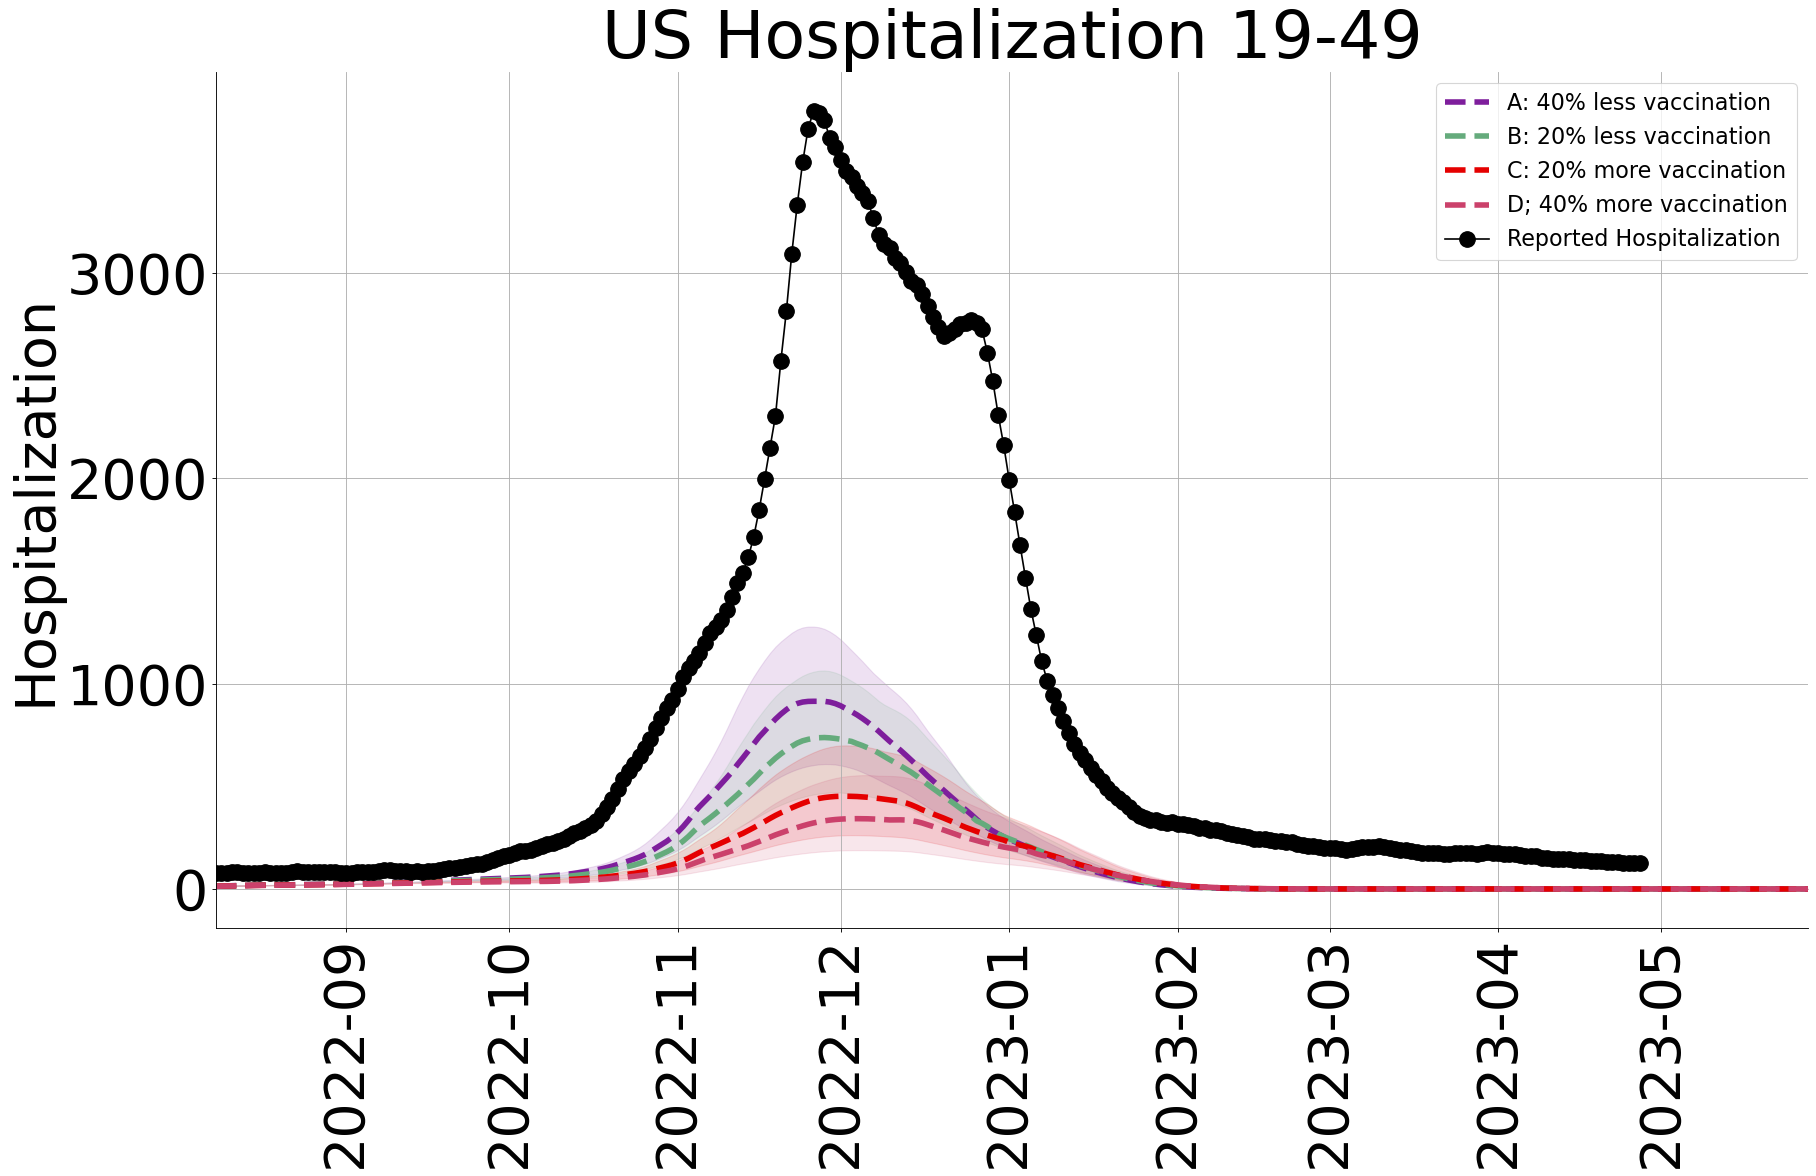

In [68]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p3_A[:,2], new_hosp_p3_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p3_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p3_B[:,2], new_hosp_p3_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p3_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p3_C[:,2], new_hosp_p3_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p3_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p3_D[:,2], new_hosp_p3_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p3_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')


plt.plot(drange2, H_ov_avgb3, 'k-o', markersize=14,label = 'Reported Hospitalization')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization 19-49') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')

In [73]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')
'''
plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:blue', lw=5, label = 'E; 100%  of 65+ population vaccinated')

'''
plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'F; 100%  of 50_64 population vaccinated')

plt.fill_between(drange1, new_hosp_p_G[:,2], new_hosp_p_G[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_G[:,12], '--', color='xkcd:dark orange', lw=5, label = 'G; 100%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p_H[:,2], new_hosp_p_H[:,21], color='xkcd:dark green', alpha=0.13)
plt.plot(drange1, new_hosp_p_H[:,12], '--', color='xkcd:dark green', lw=5, label = 'H; 100%  of 0_18 population vaccinated')
'''

plt.fill_between(drange1, new_hosp_p_I[:,2], new_hosp_p_I[:,21], color='xkcd:yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_I[:,12], '--', color='xkcd:yellow', lw=5, label = 'I; 0% of 65+ population vaccinated')

plt.plot(drange2, hosp_avg, 'k-o', markersize=14,label = 'Reported Hospitalization')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 65Hospitalizations.jpeg')

NameError: name 'new_hosp_p_E' is not defined

<Figure size 1920x1280 with 0 Axes>

In [ ]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')
'''

plt.fill_between(drange1, new_hosp_p_N[:,2], new_hosp_p_N[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_N[:,12], '--', color='xkcd:dark yellow', lw=5, label = '100%  of 50_65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_Q[:,2], new_hosp_p_Q[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_Q[:,12], '--', color='xkcd:green', lw=5, label = ' 75%  of 50_65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_P[:,2], new_hosp_p_P[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_P[:,12], '--', color='xkcd:blue', lw=5, label = ' 25%  of 50_65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_O[:,2], new_hosp_p_O[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_O[:,12], '--', color='xkcd:dark orange', lw=5, label = '0%  of 50_65+ population vaccinated')


plt.plot(drange2, hosp_avg, 'k-o', markersize=14,label = 'Reported Hospitalization: 51% of 50_65+ population vaccinated')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 50-65+Hospitalizations.jpeg')

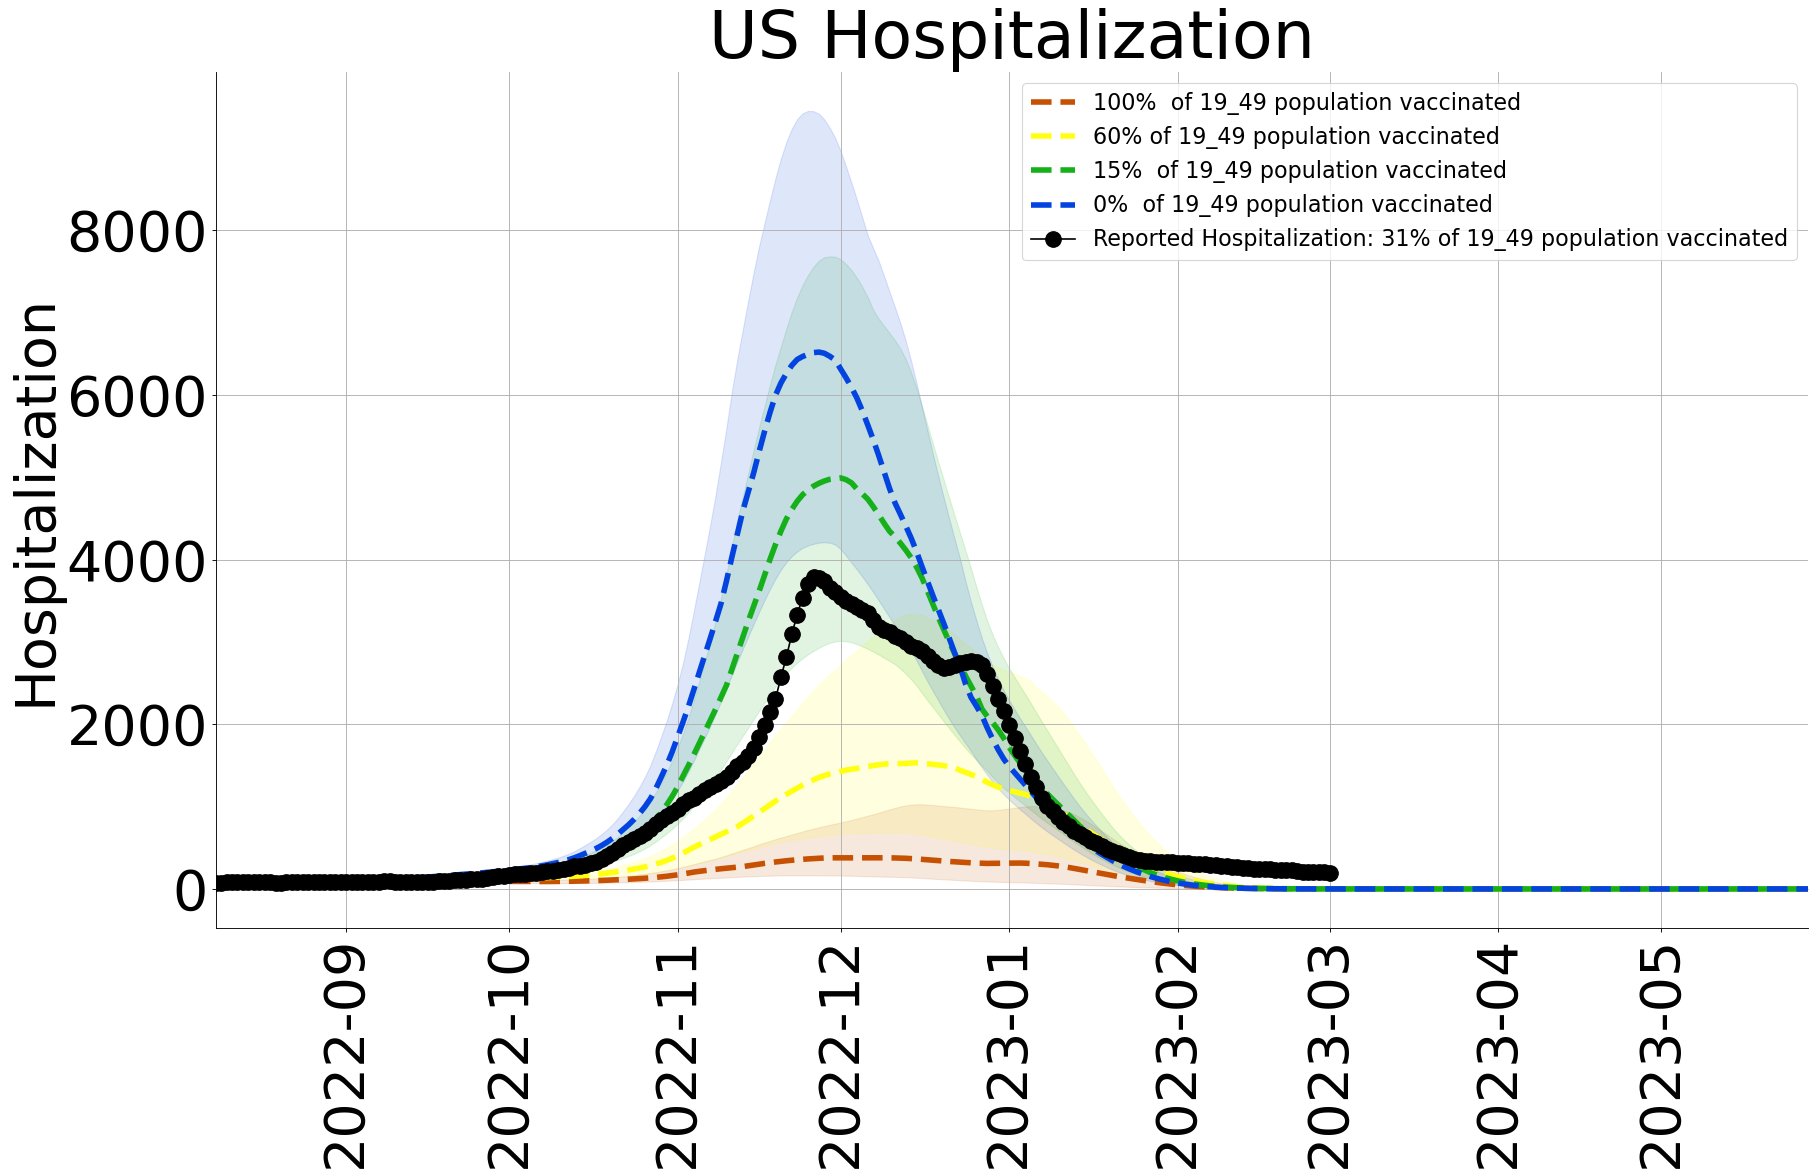

In [119]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')

plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:blue', lw=5, label = 'E; 100%  of 65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'F; 100%  of 50_64 population vaccinated')
'''

plt.fill_between(drange1, new_hosp_p_G[:,2], new_hosp_p_G[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_G[:,12], '--', color='xkcd:dark orange', lw=5, label = '100%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p_K[:,2], new_hosp_p_K[:,21], color='xkcd:yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_K[:,12], '--', color='xkcd:yellow', lw=5, label = '60% of 19_49 population vaccinated')


plt.fill_between(drange1, new_hosp_p_J[:,2], new_hosp_p_J[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_J[:,12], '--', color='xkcd:green', lw=5, label = '15%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p_R[:,2], new_hosp_p_R[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_R[:,12], '--', color='xkcd:blue', lw=5, label = '0%  of 19_49 population vaccinated')

plt.plot(drange2, hosp_avg, 'k-o', markersize=14,label = 'Reported Hospitalization: 31% of 19_49 population vaccinated')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 19-49Hospitalizations.jpeg')

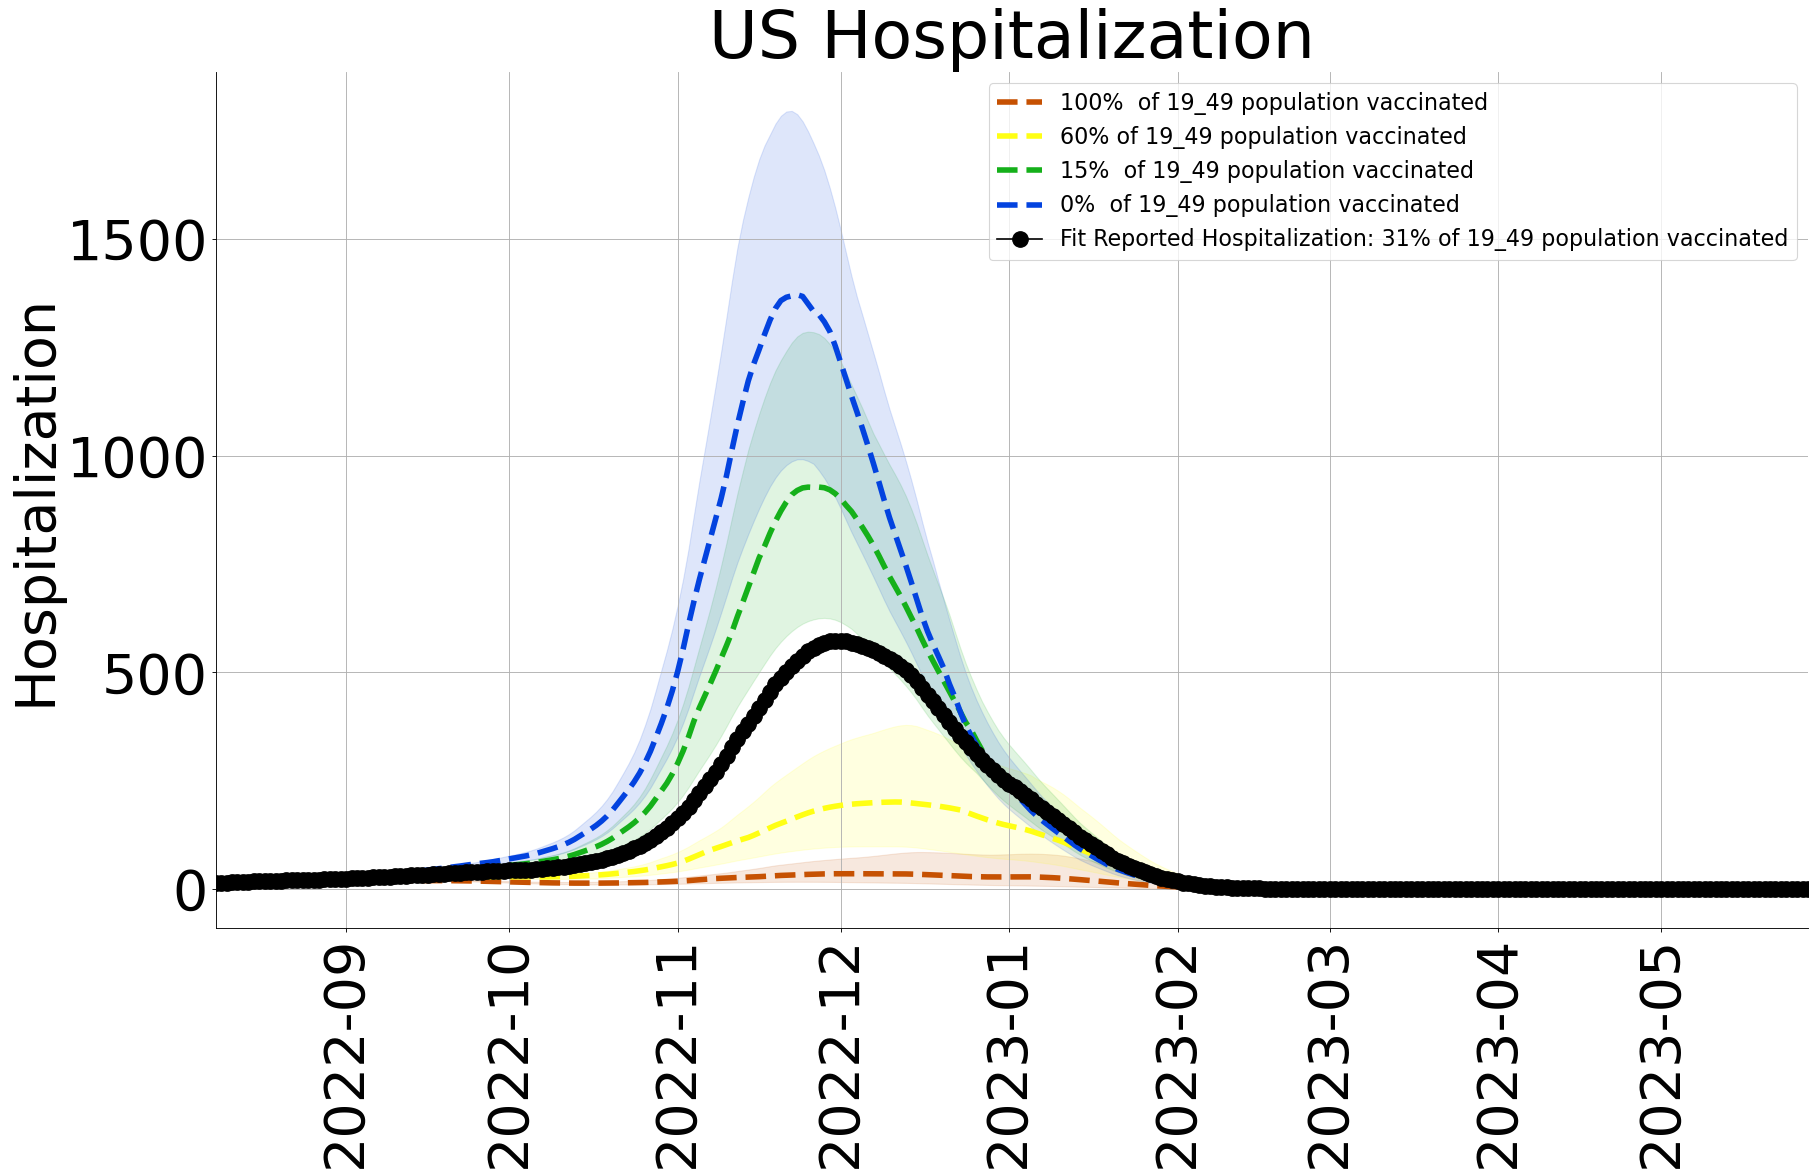

In [120]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')

plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:blue', lw=5, label = 'E; 100%  of 65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'F; 100%  of 50_64 population vaccinated')
'''

plt.fill_between(drange1, new_hosp_p3_G[:,2], new_hosp_p3_G[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p3_G[:,12], '--', color='xkcd:dark orange', lw=5, label = '100%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p3_K[:,2], new_hosp_p3_K[:,21], color='xkcd:yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p3_K[:,12], '--', color='xkcd:yellow', lw=5, label = '60% of 19_49 population vaccinated')


plt.fill_between(drange1, new_hosp_p3_J[:,2], new_hosp_p3_J[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p3_J[:,12], '--', color='xkcd:green', lw=5, label = '15%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p3_R[:,2], new_hosp_p3_R[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p3_R[:,12], '--', color='xkcd:blue', lw=5, label = '0%  of 19_49 population vaccinated')

plt.plot(drange1, H_ov_avgb3, 'k-o', markersize=14,label = 'Fit Reported Hospitalization: 31% of 19_49 population vaccinated')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 19-49Hospitalizations.jpeg')

In [76]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')

plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:blue', lw=5, label = 'E; 100%  of 65+ population vaccinated')
'''
plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'F; 100%  of 50_64 population vaccinated')

plt.fill_between(drange1, new_hosp_p_L[:,2], new_hosp_p_L[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_L[:,12], '--', color='xkcd:green', lw=5, label = 'L; 25%  of 50_64 population vaccinated')

'''
plt.fill_between(drange1, new_hosp_p_G[:,2], new_hosp_p_G[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_G[:,12], '--', color='xkcd:dark orange', lw=5, label = 'G; 100%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p_J[:,2], new_hosp_p_J[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_J[:,12], '--', color='xkcd:green', lw=5, label = 'J; 15%  of 19_49 population vaccinated')

plt.fill_between(drange1, new_hosp_p_K[:,2], new_hosp_p_K[:,21], color='xkcd:yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_K[:,12], '--', color='xkcd:yellow', lw=5, label = 'K; 60% of 19_49 population vaccinated')
'''
plt.plot(drange1, hosp_avg, 'k-o', markersize=14,label = 'Reported Hospitalization')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
plt.savefig('flufigures/'+state+' 50-64Hospitalizations.jpeg')

NameError: name 'new_hosp_p_F' is not defined

<Figure size 1920x1280 with 0 Axes>

In [ ]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
'''
plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D; 40% more vaccination')

plt.fill_between(drange1, new_hosp_p_E[:,2], new_hosp_p_E[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_E[:,12], '--', color='xkcd:blue', lw=5, label = 'E; 100%  of 65+ population vaccinated')

plt.fill_between(drange1, new_hosp_p_F[:,2], new_hosp_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'F; 100%  of 50_64 population vaccinated')

plt.fill_between(drange1, new_hosp_p_L[:,2], new_hosp_p_L[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_L[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'L; 25%  of 50_64 population vaccinated')

'''
plt.fill_between(drange1, new_hosp_p_H[:,2], new_hosp_p_H[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_H[:,12], '--', color='xkcd:blue', lw=5, label = '100%  of 0_18 population vaccinated')

plt.fill_between(drange1, new_hosp_p_T[:,2], new_hosp_p_T[:,21], color='xkcd:yellow', alpha=0.13)
plt.plot(drange1, new_hosp_p_T[:,12], '--', color='xkcd:yellow', lw=5, label = '70%  of 0_18 population vaccinated')

plt.fill_between(drange1, new_hosp_p_M[:,2], new_hosp_p_M[:,21], color='xkcd:orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_M[:,12], '--', color='xkcd:orange', lw=5, label = '20%  of 0_18 population vaccinated')

plt.fill_between(drange1, new_hosp_p_S[:,2], new_hosp_p_S[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_S[:,12], '--', color='xkcd:green', lw=5, label = '0%  of 0_18 population vaccinated')


plt.plot(drange2, hosp_avg, 'k-o', markersize=14,label = 'Reported Hospitalization: 48% of 0_18 population vaccinated')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 0-18Hospitalizations.jpeg')

In [ ]:
state

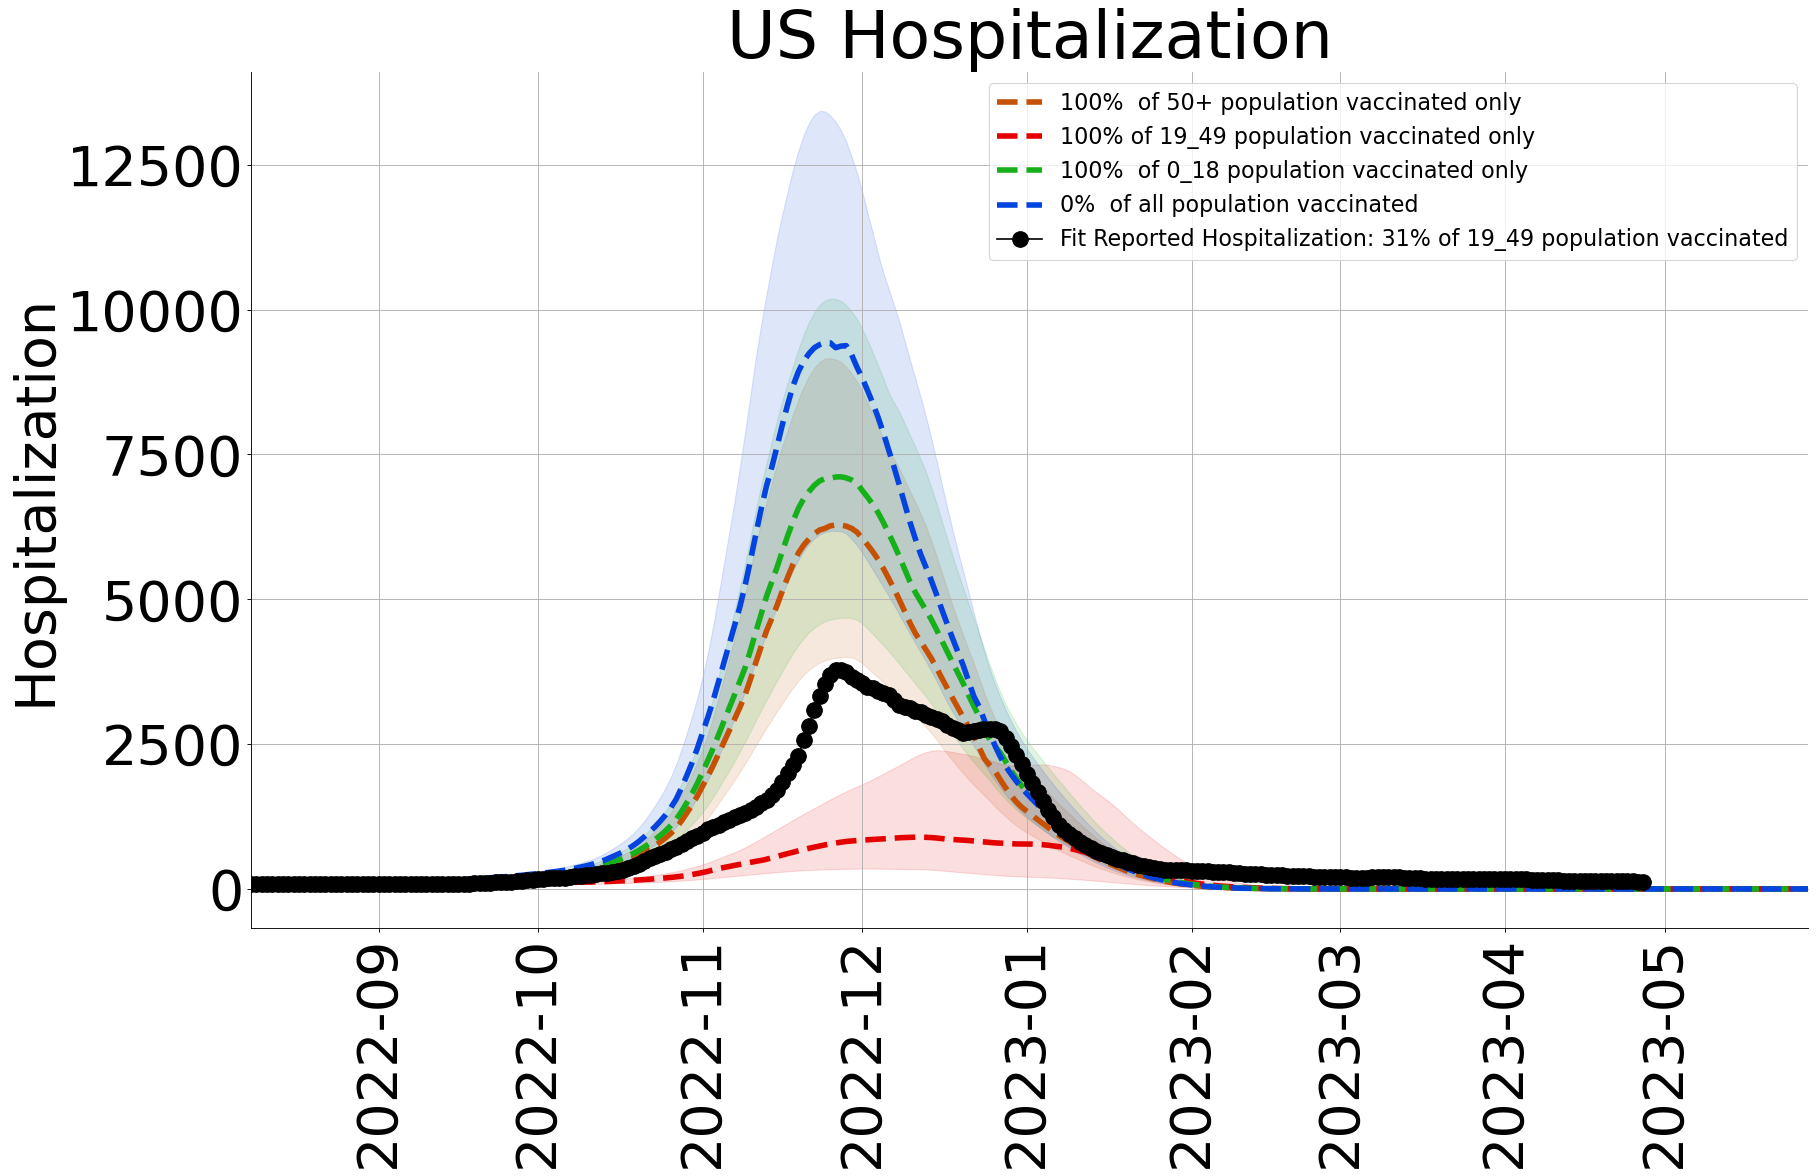

In [140]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=263, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})



plt.fill_between(drange1, new_hosp_p_T1[:,2], new_hosp_p_T1[:,21], color='xkcd:dark orange', alpha=0.13)
plt.plot(drange1, new_hosp_p_T1[:,12], '--', color='xkcd:dark orange', lw=5, label = '100%  of 50+ population vaccinated only')

plt.fill_between(drange1, new_hosp_p_T2[:,2], new_hosp_p_T2[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_T2[:,12], '--', color='xkcd:red', lw=5, label = '100% of 19_49 population vaccinated only')


plt.fill_between(drange1, new_hosp_p_T3[:,2], new_hosp_p_T3[:,21], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_T3[:,12], '--', color='xkcd:green', lw=5, label = '100%  of 0_18 population vaccinated only')

plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:blue', lw=5, label = '0%  of all population vaccinated')

plt.plot(drange2, hosp_avg2, 'k-o', markersize=14,label = 'Fit Reported Hospitalization: 31% of 19_49 population vaccinated')


plt.xticks(rotation=90)
plt.title(state + ' Hospitalization') 
plt.ylabel('Hospitalization')
plt.legend(fontsize=20);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' 19-49Hospitalizations.jpeg')

In [133]:
diff_len = len(new_hosp_p_A[:, 2]) - len(hosp_avg)
hosp_avg = np.concatenate((hosp_avg, [np.nan] * diff_len))
#len(hosp_avg)

In [134]:
import pandas as pd

# create a dictionary with some data
FLU5065 = {
    'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg,
    '2.5_per_Hosp_50_65+_100': new_hosp_p_N[:,2],
    '50_per_Hosp_50_65+_100': new_hosp_p_N[:,12],
    '97.5_per_Hosp_50_65+_100': new_hosp_p_N[:,22],
    '2.5_per_Hosp_50_65+_75': new_hosp_p_Q[:,2],
    '50_per_Hosp_50_65+_75': new_hosp_p_Q[:,12],
    '97.5_per_Hosp_50_65+_75': new_hosp_p_Q[:,22],
    '2.5_per_Hosp_50_65+_25': new_hosp_p_P[:,2],
    '50_per_Hosp_50_65+_25': new_hosp_p_P[:,12],
    '97.5_per_Hosp_50_65+_25': new_hosp_p_P[:,22],
    '2.5_per_Hosp_50_65+_0': new_hosp_p_O[:,2],
    '50_per_Hosp_50_65+_0': new_hosp_p_O[:,12],
    '97.5_per_Hosp_50_65+_0': new_hosp_p_O[:,22],

    ###
    'Fit_data_0_4':H_ov_avg0,
    '2.5_per_Hosp_50_65+_100_0_4': new_hosp_p0_N[:,2],
    '50_per_Hosp_50_65+_100_0_4': new_hosp_p0_N[:,12],
    '97.5_per_Hosp_50_65+_100_0_4': new_hosp_p0_N[:,22],
    '2.5_per_Hosp_50_65+_75_0_4': new_hosp_p0_Q[:,2],
    '50_per_Hosp_50_65+_75_0_4': new_hosp_p0_Q[:,12],
    '97.5_per_Hosp_50_65+_75_0_4': new_hosp_p0_Q[:,22],
    '2.5_per_Hosp_50_65+_25_0_4': new_hosp_p0_P[:,2],
    '50_per_Hosp_50_65+_25_0_4': new_hosp_p0_P[:,12],
    '97.5_per_Hosp_50_65+_25_0_4': new_hosp_p0_P[:,22],
    '2.5_per_Hosp_50_65+_0_0_4': new_hosp_p0_O[:,2],
    '50_per_Hosp_50_65+_0_0_4': new_hosp_p0_O[:,12],
    '97.5_per_Hosp_50_65+_0_0_4': new_hosp_p0_O[:,22],
      ###
    'Fit_data_5_11':H_ov_avg1,
    '2.5_per_Hosp_50_65+_100_5_11': new_hosp_p1_N[:,2],
    '50_per_Hosp_50_65+_100_5_11': new_hosp_p1_N[:,12],
    '97.5_per_Hosp_50_65+_100_5_11': new_hosp_p1_N[:,22],
    '2.5_per_Hosp_50_65+_75_5_11': new_hosp_p1_Q[:,2],
    '50_per_Hosp_50_65+_75_5_11': new_hosp_p1_Q[:,12],
    '97.5_per_Hosp_50_65+_75_5_11': new_hosp_p1_Q[:,22],
    '2.5_per_Hosp_50_65+_25_5_11': new_hosp_p1_P[:,2],
    '50_per_Hosp_50_65+_25_5_11': new_hosp_p1_P[:,12],
    '97.5_per_Hosp_50_65+_25_5_11': new_hosp_p1_P[:,22],
    '2.5_per_Hosp_50_65+_0_5_11': new_hosp_p1_O[:,2],
    '50_per_Hosp_50_65+_0_5_11': new_hosp_p1_O[:,12],
    '97.5_per_Hosp_50_65+_0_5_11': new_hosp_p1_O[:,22],
      ###
    'Fit_data_12_18':H_ov_avg2,
    '2.5_per_Hosp_50_65+_100_12_18': new_hosp_p2_N[:,2],
    '50_per_Hosp_50_65+_100_12_18': new_hosp_p2_N[:,12],
    '97.5_per_Hosp_50_65+_100_12_18': new_hosp_p2_N[:,22],
    '2.5_per_Hosp_50_65+_75_12_18': new_hosp_p2_Q[:,2],
    '50_per_Hosp_50_65+_75_12_18': new_hosp_p2_Q[:,12],
    '97.5_per_Hosp_50_65+_75_12_18': new_hosp_p2_Q[:,22],
    '2.5_per_Hosp_50_65+_25_12_18': new_hosp_p2_P[:,2],
    '50_per_Hosp_50_65+_25_12_18': new_hosp_p2_P[:,12],
    '97.5_per_Hosp_50_65+_25_12_18': new_hosp_p2_P[:,22],
    '2.5_per_Hosp_50_65+_0_12_18': new_hosp_p2_O[:,2],
    '50_per_Hosp_50_65+_0_12_18': new_hosp_p2_O[:,12],
    '97.5_per_Hosp_50_65+_0_12_18': new_hosp_p2_O[:,22],
    ###
    'Fit_data_19_49':H_ov_avg3,
    '2.5_per_Hosp_50_65+_100_19_49': new_hosp_p3_N[:,2],
    '50_per_Hosp_50_65+_100_19_49': new_hosp_p3_N[:,12],
    '97.5_per_Hosp_50_65+_100_19_49': new_hosp_p3_N[:,22],
    '2.5_per_Hosp_50_65+_75_19_49': new_hosp_p3_Q[:,2],
    '50_per_Hosp_50_65+_75_19_49': new_hosp_p3_Q[:,12],
    '97.5_per_Hosp_50_65+_75_19_49': new_hosp_p3_Q[:,22],
    '2.5_per_Hosp_50_65+_25_19_49': new_hosp_p3_P[:,2],
    '50_per_Hosp_50_65+_25_19_49': new_hosp_p3_P[:,12],
    '97.5_per_Hosp_50_65+_25_19_49': new_hosp_p3_P[:,22],
    '2.5_per_Hosp_50_65+_0_19_49': new_hosp_p3_O[:,2],
    '50_per_Hosp_50_65+_0_19_49': new_hosp_p3_O[:,12],
    '97.5_per_Hosp_50_65+_0_19_49': new_hosp_p3_O[:,22],
     ###
    'Fit_data_50_64':H_ov_avg4,
    '2.5_per_Hosp_50_65+_100_50_64': new_hosp_p4_N[:,2],
    '50_per_Hosp_50_65+_100_50_64': new_hosp_p4_N[:,12],
    '97.5_per_Hosp_50_65+_100_50_64': new_hosp_p4_N[:,22],
    '2.5_per_Hosp_50_65+_75_50_64': new_hosp_p4_Q[:,2],
    '50_per_Hosp_50_65+_75_50_64': new_hosp_p4_Q[:,12],
    '97.5_per_Hosp_50_65+_75_50_64': new_hosp_p4_Q[:,22],
    '2.5_per_Hosp_50_65+_25_50_64': new_hosp_p4_P[:,2],
    '50_per_Hosp_50_65+_25_50_64': new_hosp_p4_P[:,12],
    '97.5_per_Hosp_50_65+_25_50_64': new_hosp_p4_P[:,22],
    '2.5_per_Hosp_50_65+_0_50_64': new_hosp_p4_O[:,2],
    '50_per_Hosp_50_65+_0_50_64': new_hosp_p4_O[:,12],
    '97.5_per_Hosp_50_65+_0_50_64': new_hosp_p4_O[:,22],
    ###
    'Fit_data_65+':H_ov_avg5,
    '2.5_per_Hosp_50_65+_100_65+': new_hosp_p5_N[:,2],
    '50_per_Hosp_50_65+_100_65+': new_hosp_p5_N[:,12],
    '97.5_per_Hosp_50_65+_100_65+': new_hosp_p5_N[:,22],
    '2.5_per_Hosp_50_65+_75_65+': new_hosp_p5_Q[:,2],
    '50_per_Hosp_50_65+_75_65+': new_hosp_p5_Q[:,12],
    '97.5_per_Hosp_50_65+_75_65+': new_hosp_p5_Q[:,22],
    '2.5_per_Hosp_50_65+_25_65+': new_hosp_p5_P[:,2],
    '50_per_Hosp_50_65+_25_65+': new_hosp_p5_P[:,12],
    '97.5_per_Hosp_50_65+_25_65+': new_hosp_p5_P[:,22],
    '2.5_per_Hosp_50_65+_0_65+': new_hosp_p5_O[:,2],
    '50_per_Hosp_50_65+_0_65+': new_hosp_p5_O[:,12],
    '97.5_per_Hosp_50_65+_0_65+': new_hosp_p5_O[:,22]
}

# create a DataFrame from the dictionary
d5065 = pd.DataFrame(FLU5065)

# print the DataFrame
#print(dABCD)


In [135]:
import pandas as pd

# create a dictionary with some data
FLUABCD = {
    'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg,
    '2.5_per_Hosp_A': new_hosp_p_A[:,2],
    '50_per_Hosp_A': new_hosp_p_A[:,12],
    '97.5_per_Hosp_A': new_hosp_p_A[:,22],
    '2.5_per_Hosp_B': new_hosp_p_B[:,2],
    '50_per_Hosp_B': new_hosp_p_B[:,12],
    '97.5_per_Hosp_B': new_hosp_p_B[:,22],
    '2.5_per_Hosp_C': new_hosp_p_C[:,2],
    '50_per_Hosp_C': new_hosp_p_C[:,12],
    '97.5_per_Hosp_C': new_hosp_p_C[:,22],
    '2.5_per_Hosp_D': new_hosp_p_D[:,2],
    '50_per_Hosp_D': new_hosp_p_D[:,12],
    '97.5_per_Hosp_D': new_hosp_p_D[:,22],

    ###
    'Fit_data_0_4':H_ov_avg0,
    '2.5_per_Hosp_A_0_4': new_hosp_p0_A[:,2],
    '50_per_Hosp_A_0_4': new_hosp_p0_A[:,12],
    '97.5_per_Hosp_A_0_4': new_hosp_p0_A[:,22],
    '2.5_per_Hosp_B_0_4': new_hosp_p0_B[:,2],
    '50_per_Hosp_B_0_4': new_hosp_p0_B[:,12],
    '97.5_per_Hosp_B_0_4': new_hosp_p0_B[:,22],
    '2.5_per_Hosp_C_0_4': new_hosp_p0_C[:,2],
    '50_per_Hosp_C_0_4': new_hosp_p0_C[:,12],
    '97.5_per_Hosp_C_0_4': new_hosp_p0_C[:,22],
    '2.5_per_Hosp_D_0_4': new_hosp_p0_D[:,2],
    '50_per_Hosp_D_0_4': new_hosp_p0_D[:,12],
    '97.5_per_Hosp_D_0_4': new_hosp_p0_D[:,22],
      ###
    'Fit_data_5_11':H_ov_avg1,
    '2.5_per_Hosp_A_5_11': new_hosp_p1_A[:,2],
    '50_per_Hosp_A_5_11': new_hosp_p1_A[:,12],
    '97.5_per_Hosp_A_5_11': new_hosp_p1_A[:,22],
    '2.5_per_Hosp_B_5_11': new_hosp_p1_B[:,2],
    '50_per_Hosp_B_5_11': new_hosp_p1_B[:,12],
    '97.5_per_Hosp_B_5_11': new_hosp_p1_B[:,22],
    '2.5_per_Hosp_C_5_11': new_hosp_p1_C[:,2],
    '50_per_Hosp_C_5_11': new_hosp_p1_C[:,12],
    '97.5_per_Hosp_C_5_11': new_hosp_p1_C[:,22],
    '2.5_per_Hosp_D_5_11': new_hosp_p1_D[:,2],
    '50_per_Hosp_D_5_11': new_hosp_p1_D[:,12],
    '97.5_per_Hosp_D_5_11': new_hosp_p1_D[:,22],

      ###
    'Fit_data_12_18':H_ov_avg2,
    '2.5_per_Hosp_A_12_18': new_hosp_p2_A[:,2],
    '50_per_Hosp_A_12_18': new_hosp_p2_A[:,12],
    '97.5_per_Hosp_A_12_18': new_hosp_p2_A[:,22],
    '2.5_per_Hosp_B_12_18': new_hosp_p2_B[:,2],
    '50_per_Hosp_B_12_18': new_hosp_p2_B[:,12],
    '97.5_per_Hosp_B_12_18': new_hosp_p2_B[:,22],
    '2.5_per_Hosp_C_12_18': new_hosp_p2_C[:,2],
    '50_per_Hosp_C_12_18': new_hosp_p2_C[:,12],
    '97.5_per_Hosp_C_12_18': new_hosp_p2_C[:,22],
    '2.5_per_Hosp_D_12_18': new_hosp_p2_D[:,2],
    '50_per_Hosp_D_12_18': new_hosp_p2_D[:,12],
    '97.5_per_Hosp_D_12_18': new_hosp_p2_D[:,22],

    ###
    'Fit_data_19_49':H_ov_avg3,
    '2.5_per_Hosp_A_19_49': new_hosp_p3_A[:,2],
    '50_per_Hosp_A_19_49': new_hosp_p3_A[:,12],
    '97.5_per_Hosp_A_19_49': new_hosp_p3_A[:,22],
    '2.5_per_Hosp_B_19_49': new_hosp_p3_B[:,2],
    '50_per_Hosp_B_19_49': new_hosp_p3_B[:,12],
    '97.5_per_Hosp_B_19_49': new_hosp_p3_B[:,22],
    '2.5_per_Hosp_C_19_49': new_hosp_p3_C[:,2],
    '50_per_Hosp_C_19_49': new_hosp_p3_C[:,12],
    '97.5_per_Hosp_C_19_49': new_hosp_p3_C[:,22],
    '2.5_per_Hosp_D_19_49': new_hosp_p3_D[:,2],
    '50_per_Hosp_D_19_49': new_hosp_p3_D[:,12],
    '97.5_per_Hosp_D_19_49': new_hosp_p3_D[:,22],

     ###
    'Fit_data_50_64':H_ov_avg4,
    '2.5_per_Hosp_A_50_64': new_hosp_p4_A[:,2],
    '50_per_Hosp_A_50_64': new_hosp_p4_A[:,12],
    '97.5_per_Hosp_A_50_64': new_hosp_p4_A[:,22],
    '2.5_per_Hosp_B_50_64': new_hosp_p4_B[:,2],
    '50_per_Hosp_B_50_64': new_hosp_p4_B[:,12],
    '97.5_per_Hosp_B_50_64': new_hosp_p4_B[:,22],
    '2.5_per_Hosp_C_50_64': new_hosp_p4_C[:,2],
    '50_per_Hosp_C_50_64': new_hosp_p4_C[:,12],
    '97.5_per_Hosp_C_50_64': new_hosp_p4_C[:,22],
    '2.5_per_Hosp_D_50_64': new_hosp_p4_D[:,2],
    '50_per_Hosp_D_50_64': new_hosp_p4_D[:,12],
    '97.5_per_Hosp_D_50_64': new_hosp_p4_D[:,22],
    ###
    'Fit_data_65+':H_ov_avg5,
    '2.5_per_Hosp_A_65+': new_hosp_p5_A[:,2],
    '50_per_Hosp_A_65+': new_hosp_p5_A[:,12],
    '97.5_per_Hosp_A_65+': new_hosp_p5_A[:,22],
    '2.5_per_Hosp_B_65+': new_hosp_p5_B[:,2],
    '50_per_Hosp_B_65+': new_hosp_p5_B[:,12],
    '97.5_per_Hosp_B_65+': new_hosp_p5_B[:,22],
    '2.5_per_Hosp_C_65+': new_hosp_p5_C[:,2],
    '50_per_Hosp_C_65+': new_hosp_p5_C[:,12],
    '97.5_per_Hosp_C_65+': new_hosp_p5_C[:,22],
    '2.5_per_Hosp_D_65+': new_hosp_p5_D[:,2],
    '50_per_Hosp_D_65+': new_hosp_p5_D[:,12],
    '97.5_per_Hosp_D_65+': new_hosp_p5_D[:,22]
}

# create a DataFrame from the dictionary
dABCD = pd.DataFrame(FLUABCD)

# print the DataFrame
#print(dABCD)


In [136]:
import pandas as pd

# create a dictionary with some data
FLU1949 = {
    'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg,
    '2.5_per_Hosp_19_49_100': new_hosp_p_G[:,2],
    '50_per_Hosp_19_49_100': new_hosp_p_G[:,12],
    '97.5_per_Hosp_19_49_100': new_hosp_p_G[:,22],
    '2.5_per_Hosp_19_49_60': new_hosp_p_K[:,2],
    '50_per_Hosp_19_49_60': new_hosp_p_K[:,12],
    '97.5_per_Hosp_19_49_60': new_hosp_p_K[:,22],
    '2.5_per_Hosp_19_49_15': new_hosp_p_J[:,2],
    '50_per_Hosp_19_49_15': new_hosp_p_J[:,12],
    '97.5_per_Hosp_19_49_15': new_hosp_p_J[:,22],
    '2.5_per_Hosp_19_49_0': new_hosp_p_R[:,2],
    '50_per_Hosp_19_49_0': new_hosp_p_R[:,12],
    '97.5_per_Hosp_19_49_0': new_hosp_p_R[:,22], 
    ###
    'Fit_data_0_4':H_ov_avg0,
    '2.5_per_Hosp_19_49_100_0_4': new_hosp_p0_G[:,2],
    '50_per_Hosp_19_49_100_0_4': new_hosp_p0_G[:,12],
    '97.5_per_Hosp_19_49_100_0_4': new_hosp_p0_G[:,22],
    '2.5_per_Hosp_19_49_60_0_4': new_hosp_p0_K[:,2],
    '50_per_Hosp_19_49_60_0_4': new_hosp_p0_K[:,12],
    '97.5_per_Hosp_19_49_60_0_4': new_hosp_p0_K[:,22],
    '2.5_per_Hosp_19_49_15_0_4': new_hosp_p0_J[:,2],
    '50_per_Hosp_19_49_15_0_4': new_hosp_p0_J[:,12],
    '97.5_per_Hosp_19_49_15_0_4': new_hosp_p0_J[:,22],
    '2.5_per_Hosp_19_49_0_0_4': new_hosp_p0_R[:,2],
    '50_per_Hosp_19_49_0_0_4': new_hosp_p0_R[:,12],
    '97.5_per_Hosp_19_49_0_0_4': new_hosp_p0_R[:,22], 
      ###
    'Fit_data_5_11':H_ov_avg1,
    '2.5_per_Hosp_19_49_100_5_11': new_hosp_p1_G[:,2],
    '50_per_Hosp_19_49_100_5_11': new_hosp_p1_G[:,12],
    '97.5_per_Hosp_19_49_100_5_11': new_hosp_p1_G[:,22],
    '2.5_per_Hosp_19_49_60_5_11': new_hosp_p1_K[:,2],
    '50_per_Hosp_19_49_60_5_11': new_hosp_p1_K[:,12],
    '97.5_per_Hosp_19_49_60_5_11': new_hosp_p1_K[:,22],
    '2.5_per_Hosp_19_49_15_5_11': new_hosp_p1_J[:,2],
    '50_per_Hosp_19_49_15_5_11': new_hosp_p1_J[:,12],
    '97.5_per_Hosp_19_49_15_5_11': new_hosp_p1_J[:,22],
    '2.5_per_Hosp_19_49_0_5_11': new_hosp_p1_R[:,2],
    '50_per_Hosp_19_49_0_5_11': new_hosp_p1_R[:,12],
    '97.5_per_Hosp_19_49_0_5_11': new_hosp_p1_R[:,22], 

      ###
    'Fit_data_12_18':H_ov_avg2,
    '2.5_per_Hosp_19_49_100_12_18': new_hosp_p2_G[:,2],
    '50_per_Hosp_19_49_100_12_18': new_hosp_p2_G[:,12],
    '97.5_per_Hosp_19_49_100_12_18': new_hosp_p2_G[:,22],
    '2.5_per_Hosp_19_49_60_12_18': new_hosp_p2_K[:,2],
    '50_per_Hosp_19_49_60_12_18': new_hosp_p2_K[:,12],
    '97.5_per_Hosp_19_49_60_12_18': new_hosp_p2_K[:,22],
    '2.5_per_Hosp_19_49_15_12_18': new_hosp_p2_J[:,2],
    '50_per_Hosp_19_49_15_12_18': new_hosp_p2_J[:,12],
    '97.5_per_Hosp_19_49_15_12_18': new_hosp_p2_J[:,22],
    '2.5_per_Hosp_19_49_0_12_18': new_hosp_p2_R[:,2],
    '50_per_Hosp_19_49_0_12_18': new_hosp_p2_R[:,12],
    '97.5_per_Hosp_19_49_0_12_18': new_hosp_p2_R[:,22], 

    ###
    'Fit_data_19_49':H_ov_avg3,
    '2.5_per_Hosp_19_49_100_19_49': new_hosp_p3_G[:,2],
    '50_per_Hosp_19_49_100_19_49': new_hosp_p3_G[:,12],
    '97.5_per_Hosp_19_49_100_19_49': new_hosp_p3_G[:,22],
    '2.5_per_Hosp_19_49_60_19_49': new_hosp_p3_K[:,2],
    '50_per_Hosp_19_49_60_19_49': new_hosp_p3_K[:,12],
    '97.5_per_Hosp_19_49_60_19_49': new_hosp_p3_K[:,22],
    '2.5_per_Hosp_19_49_15_19_49': new_hosp_p3_J[:,2],
    '50_per_Hosp_19_49_15_19_49': new_hosp_p3_J[:,12],
    '97.5_per_Hosp_19_49_15_19_49': new_hosp_p3_J[:,22],
    '2.5_per_Hosp_19_49_0_19_49': new_hosp_p3_R[:,2],
    '50_per_Hosp_19_49_0_19_49': new_hosp_p3_R[:,12],
    '97.5_per_Hosp_19_49_0_19_49': new_hosp_p3_R[:,22], 

     ###
    'Fit_data_50_64':H_ov_avg4,
    '2.5_per_Hosp_19_49_100_50_64': new_hosp_p4_G[:,2],
    '50_per_Hosp_19_49_100_50_64': new_hosp_p4_G[:,12],
    '97.5_per_Hosp_19_49_100_50_64': new_hosp_p4_G[:,22],
    '2.5_per_Hosp_19_49_60_50_64': new_hosp_p4_K[:,2],
    '50_per_Hosp_19_49_60_50_64': new_hosp_p4_K[:,12],
    '97.5_per_Hosp_19_49_60_50_64': new_hosp_p4_K[:,22],
    '2.5_per_Hosp_19_49_15_50_64': new_hosp_p4_J[:,2],
    '50_per_Hosp_19_49_15_50_64': new_hosp_p4_J[:,12],
    '97.5_per_Hosp_19_49_15_50_64': new_hosp_p4_J[:,22],
    '2.5_per_Hosp_19_49_0_50_64': new_hosp_p4_R[:,2],
    '50_per_Hosp_19_49_0_50_64': new_hosp_p4_R[:,12],
    '97.5_per_Hosp_19_49_0_50_64': new_hosp_p4_R[:,22], 
    ###
    'Fit_data_65+':H_ov_avg5,
    '2.5_per_Hosp_19_49_100_65+': new_hosp_p5_G[:,2],
    '50_per_Hosp_19_49_100_65+': new_hosp_p5_G[:,12],
    '97.5_per_Hosp_19_49_100_65+': new_hosp_p5_G[:,22],
    '2.5_per_Hosp_19_49_60_65+': new_hosp_p5_K[:,2],
    '50_per_Hosp_19_49_60_65+': new_hosp_p5_K[:,12],
    '97.5_per_Hosp_19_49_60_65+': new_hosp_p5_K[:,22],
    '2.5_per_Hosp_19_49_15_65+': new_hosp_p5_J[:,2],
    '50_per_Hosp_19_49_15_65+': new_hosp_p5_J[:,12],
    '97.5_per_Hosp_19_49_15_65+': new_hosp_p5_J[:,22],
    '2.5_per_Hosp_19_49_0_65+': new_hosp_p5_R[:,2],
    '50_per_Hosp_19_49_0_65+': new_hosp_p5_R[:,12],
    '97.5_per_Hosp_19_49_0_65+': new_hosp_p5_R[:,22] 
}

# create a DataFrame from the dictionary
d1949 = pd.DataFrame(FLU1949)

# print the DataFrame
#print(dABCD)


In [137]:
import pandas as pd

# create a dictionary with some data
FLU018 = {
    'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg,
    '2.5_per_Hosp_0_18_100': new_hosp_p_H[:,2],
    '50_per_Hosp_0_18_100': new_hosp_p_H[:,12],
    '97.5_per_Hosp_0_18_100': new_hosp_p_H[:,22],
    '2.5_per_Hosp_0_18_70': new_hosp_p_T[:,2],
    '50_per_Hosp_0_18_70': new_hosp_p_T[:,12],
    '97.5_per_Hosp_0_18_70': new_hosp_p_T[:,22],
    '2.5_per_Hosp_0_18_20': new_hosp_p_M[:,2],
    '50_per_Hosp_0_18_20': new_hosp_p_M[:,12],
    '97.5_per_Hosp_0_18_20': new_hosp_p_M[:,22],
    '2.5_per_Hosp_0_18_0': new_hosp_p_S[:,2],
    '50_per_Hosp_0_18_0': new_hosp_p_S[:,12],
    '97.5_per_Hosp_0_18_0': new_hosp_p_S[:,22],
    ###
    'Fit_data_0_4':H_ov_avg0,
    '2.5_per_Hosp_0_18_100_0_4': new_hosp_p0_H[:,2],
    '50_per_Hosp_0_18_100_0_4': new_hosp_p0_H[:,12],
    '97.5_per_Hosp_0_18_100_0_4': new_hosp_p0_H[:,22],
    '2.5_per_Hosp_0_18_70_0_4': new_hosp_p0_T[:,2],
    '50_per_Hosp_0_18_70_0_4': new_hosp_p0_T[:,12],
    '97.5_per_Hosp_0_18_70_0_4': new_hosp_p0_T[:,22],
    '2.5_per_Hosp_0_18_20_0_4': new_hosp_p0_M[:,2],
    '50_per_Hosp_0_18_20_0_4': new_hosp_p0_M[:,12],
    '97.5_per_Hosp_0_18_20_0_4': new_hosp_p0_M[:,22],
    '2.5_per_Hosp_0_18_0_0_4': new_hosp_p0_S[:,2],
    '50_per_Hosp_0_18_0_0_4': new_hosp_p0_S[:,12],
    '97.5_per_Hosp_0_18_0_0_4': new_hosp_p0_S[:,22],
      ###
    'Fit_data_5_11':H_ov_avg1,
    '2.5_per_Hosp_0_18_100_5_11': new_hosp_p1_H[:,2],
    '50_per_Hosp_0_18_100_5_11': new_hosp_p1_H[:,12],
    '97.5_per_Hosp_0_18_100_5_11': new_hosp_p1_H[:,22],
    '2.5_per_Hosp_0_18_70_5_11': new_hosp_p1_T[:,2],
    '50_per_Hosp_0_18_70_5_11': new_hosp_p1_T[:,12],
    '97.5_per_Hosp_0_18_70_5_11': new_hosp_p1_T[:,22],
    '2.5_per_Hosp_0_18_20_5_11': new_hosp_p1_M[:,2],
    '50_per_Hosp_0_18_20_5_11': new_hosp_p1_M[:,12],
    '97.5_per_Hosp_0_18_20_5_11': new_hosp_p1_M[:,22],
    '2.5_per_Hosp_0_18_0_5_11': new_hosp_p1_S[:,2],
    '50_per_Hosp_0_18_0_5_11': new_hosp_p1_S[:,12],
    '97.5_per_Hosp_0_18_0_5_11': new_hosp_p1_S[:,22],
      ###
    'Fit_data_12_18':H_ov_avg2,
    '2.5_per_Hosp_0_18_100_12_18': new_hosp_p2_H[:,2],
    '50_per_Hosp_0_18_100_12_18': new_hosp_p2_H[:,12],
    '97.5_per_Hosp_0_18_100_12_18': new_hosp_p2_H[:,22],
    '2.5_per_Hosp_0_18_70_12_18': new_hosp_p2_T[:,2],
    '50_per_Hosp_0_18_70_12_18': new_hosp_p2_T[:,12],
    '97.5_per_Hosp_0_18_70_12_18': new_hosp_p2_T[:,22],
    '2.5_per_Hosp_0_18_20_12_18': new_hosp_p2_M[:,2],
    '50_per_Hosp_0_18_20_12_18': new_hosp_p2_M[:,12],
    '97.5_per_Hosp_0_18_20_12_18': new_hosp_p2_M[:,22],
    '2.5_per_Hosp_0_18_0_12_18': new_hosp_p2_S[:,2],
    '50_per_Hosp_0_18_0_12_18': new_hosp_p2_S[:,12],
    '97.5_per_Hosp_0_18_0_12_18': new_hosp_p2_S[:,22],
    ###
    'Fit_data_19_49':H_ov_avg3,
    '2.5_per_Hosp_0_18_100_19_49': new_hosp_p3_H[:,2],
    '50_per_Hosp_0_18_100_19_49': new_hosp_p3_H[:,12],
    '97.5_per_Hosp_0_18_100_19_49': new_hosp_p3_H[:,22],
    '2.5_per_Hosp_0_18_70_19_49': new_hosp_p3_T[:,2],
    '50_per_Hosp_0_18_70_19_49': new_hosp_p3_T[:,12],
    '97.5_per_Hosp_0_18_70_19_49': new_hosp_p3_T[:,22],
    '2.5_per_Hosp_0_18_20_19_49': new_hosp_p3_M[:,2],
    '50_per_Hosp_0_18_20_19_49': new_hosp_p3_M[:,12],
    '97.5_per_Hosp_0_18_20_19_49': new_hosp_p3_M[:,22],
    '2.5_per_Hosp_0_18_0_19_49': new_hosp_p3_S[:,2],
    '50_per_Hosp_0_18_0_19_49': new_hosp_p3_S[:,12],
    '97.5_per_Hosp_0_18_0_19_49': new_hosp_p3_S[:,22],
     ###
    'Fit_data_50_64':H_ov_avg4,
    '2.5_per_Hosp_0_18_100_50_64': new_hosp_p4_H[:,2],
    '50_per_Hosp_0_18_100_50_64': new_hosp_p4_H[:,12],
    '97.5_per_Hosp_0_18_100_50_64': new_hosp_p4_H[:,22],
    '2.5_per_Hosp_0_18_70_50_64': new_hosp_p4_T[:,2],
    '50_per_Hosp_0_18_70_50_64': new_hosp_p4_T[:,12],
    '97.5_per_Hosp_0_18_70_50_64': new_hosp_p4_T[:,22],
    '2.5_per_Hosp_0_18_20_50_64': new_hosp_p4_M[:,2],
    '50_per_Hosp_0_18_20_50_64': new_hosp_p4_M[:,12],
    '97.5_per_Hosp_0_18_20_50_64': new_hosp_p4_M[:,22],
    '2.5_per_Hosp_0_18_0_50_64': new_hosp_p4_S[:,2],
    '50_per_Hosp_0_18_0_50_64': new_hosp_p4_S[:,12],
    '97.5_per_Hosp_0_18_0_50_64': new_hosp_p4_S[:,22],
    ###
    'Fit_data_65+':H_ov_avg5,
    '2.5_per_Hosp_0_18_100_65+': new_hosp_p5_H[:,2],
    '50_per_Hosp_0_18_100_65+': new_hosp_p5_H[:,12],
    '97.5_per_Hosp_0_18_100_65+': new_hosp_p5_H[:,22],
    '2.5_per_Hosp_0_18_70_65+': new_hosp_p5_T[:,2],
    '50_per_Hosp_0_18_70_65+': new_hosp_p5_T[:,12],
    '97.5_per_Hosp_0_18_70_65+': new_hosp_p5_T[:,22],
    '2.5_per_Hosp_0_18_20_65+': new_hosp_p5_M[:,2],
    '50_per_Hosp_0_18_20_65+': new_hosp_p5_M[:,12],
    '97.5_per_Hosp_0_18_20_65+': new_hosp_p5_M[:,22],
    '2.5_per_Hosp_0_18_0_65+': new_hosp_p5_S[:,2],
    '50_per_Hosp_0_18_0_65+': new_hosp_p5_S[:,12],
    '97.5_per_Hosp_0_18_0_65+': new_hosp_p5_S[:,22]
}

# create a DataFrame from the dictionary
d018 = pd.DataFrame(FLU018)

# print the DataFrame
#print(dABCD)


In [138]:
import pandas as pd

# create a dictionary with some data
FLU065R0 = {
    'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg,
    '2.5_per_Hosp_65+_100R0': new_hosp_p_T1[:,2],
    '50_per_Hosp_65+_100R0': new_hosp_p_T1[:,12],
    '97.5_per_Hosp_65+_100R0': new_hosp_p_T1[:,22],
    '2.5_per_Hosp_19_49_100R0': new_hosp_p_T2[:,2],
    '50_per_Hosp_19_49_100R0': new_hosp_p_T2[:,12],
    '97.5_per_Hosp_19_49_100R0': new_hosp_p_T2[:,22],
    '2.5_per_Hosp_0_18_100R0': new_hosp_p_T3[:,2],
    '50_per_Hosp_0_18_100R0': new_hosp_p_T3[:,12],
    '97.5_per_Hosp_0_18_100R0': new_hosp_p_T3[:,22],
    '2.5_per_Hosp_all_0': new_hosp_p_T4[:,2],
    '50_per_Hosp_all_0': new_hosp_p_T4[:,12],
    '97.5_per_Hosp_all_0': new_hosp_p_T4[:,22],
    ###
    'Fit_data_0_4':H_ov_avg0,
    '2.5_per_Hosp_65+_100R0_0_4': new_hosp_p0_T1[:,2],
    '50_per_Hosp_65+_100R0_0_4': new_hosp_p0_T1[:,12],
    '97.5_per_Hosp_65+_100R0_0_4': new_hosp_p0_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_0_4': new_hosp_p0_T2[:,2],
    '50_per_Hosp_19_49_100R0_0_4': new_hosp_p0_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_0_4': new_hosp_p0_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_0_4': new_hosp_p0_T3[:,2],
    '50_per_Hosp_0_18_100R0_0_4': new_hosp_p0_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_0_4': new_hosp_p0_T3[:,22],
    '2.5_per_Hosp_all_0_0_4': new_hosp_p0_T4[:,2],
    '50_per_Hosp_all_0_0_4': new_hosp_p0_T4[:,12],
    '97.5_per_Hosp_all_0_0_4': new_hosp_p0_T4[:,22],
      ###
    'Fit_data_5_11':H_ov_avg1,
    '2.5_per_Hosp_65+_100R0_5_11': new_hosp_p1_T1[:,2],
    '50_per_Hosp_65+_100R0_5_11': new_hosp_p1_T1[:,12],
    '97.5_per_Hosp_65+_100R0_5_11': new_hosp_p1_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_5_11': new_hosp_p1_T2[:,2],
    '50_per_Hosp_19_49_100R0_5_11': new_hosp_p1_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_5_11': new_hosp_p1_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_5_11': new_hosp_p1_T3[:,2],
    '50_per_Hosp_0_18_100R0_5_11': new_hosp_p1_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_5_11': new_hosp_p1_T3[:,22],
    '2.5_per_Hosp_all_0_5_11': new_hosp_p1_T4[:,2],
    '50_per_Hosp_all_0_5_11': new_hosp_p1_T4[:,12],
    '97.5_per_Hosp_all_0_5_11': new_hosp_p1_T4[:,22],
      ###
    'Fit_data_12_18':H_ov_avg2,
    '2.5_per_Hosp_65+_100R0_12_18': new_hosp_p2_T1[:,2],
    '50_per_Hosp_65+_100R0_12_18': new_hosp_p2_T1[:,12],
    '97.5_per_Hosp_65+_100R0_12_18': new_hosp_p2_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_12_18': new_hosp_p2_T2[:,2],
    '50_per_Hosp_19_49_100R0_12_18': new_hosp_p2_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_12_18': new_hosp_p2_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_12_18': new_hosp_p2_T3[:,2],
    '50_per_Hosp_0_18_100R0_12_18': new_hosp_p2_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_12_18': new_hosp_p2_T3[:,22],
    '2.5_per_Hosp_all_0_12_18': new_hosp_p2_T4[:,2],
    '50_per_Hosp_all_0_12_18': new_hosp_p2_T4[:,12],
    '97.5_per_Hosp_all_0_12_18': new_hosp_p2_T4[:,22],
    ###
    'Fit_data_19_49':H_ov_avg3,
    '2.5_per_Hosp_65+_100R0_19_49': new_hosp_p3_T1[:,2],
    '50_per_Hosp_65+_100R0_19_49': new_hosp_p3_T1[:,12],
    '97.5_per_Hosp_65+_100R0_19_49': new_hosp_p3_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_19_49': new_hosp_p3_T2[:,2],
    '50_per_Hosp_19_49_100R0_19_49': new_hosp_p3_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_19_49': new_hosp_p3_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_19_49': new_hosp_p3_T3[:,2],
    '50_per_Hosp_0_18_100R0_19_49': new_hosp_p3_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_19_49': new_hosp_p3_T3[:,22],
    '2.5_per_Hosp_all_0_19_49': new_hosp_p3_T4[:,2],
    '50_per_Hosp_all_0_19_49': new_hosp_p3_T4[:,12],
    '97.5_per_Hosp_all_0_19_49': new_hosp_p3_T4[:,22],
     ###
    'Fit_data_50_64':H_ov_avg4,
    '2.5_per_Hosp_65+_100R0_50_64': new_hosp_p4_T1[:,2],
    '50_per_Hosp_65+_100R0_50_64': new_hosp_p4_T1[:,12],
    '97.5_per_Hosp_65+_100R0_50_64': new_hosp_p4_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_50_64': new_hosp_p4_T2[:,2],
    '50_per_Hosp_19_49_100R0_50_64': new_hosp_p4_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_50_64': new_hosp_p4_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_50_64': new_hosp_p4_T3[:,2],
    '50_per_Hosp_0_18_100R0_50_64': new_hosp_p4_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_50_64': new_hosp_p4_T3[:,22],
    '2.5_per_Hosp_all_0_50_64': new_hosp_p4_T4[:,2],
    '50_per_Hosp_all_0_50_64': new_hosp_p4_T4[:,12],
    '97.5_per_Hosp_all_0_50_64': new_hosp_p4_T4[:,22],
    ###
    'Fit_data_65+':H_ov_avg5,
    '2.5_per_Hosp_65+_100R0_65+': new_hosp_p5_T1[:,2],
    '50_per_Hosp_65+_100R0_65+': new_hosp_p5_T1[:,12],
    '97.5_per_Hosp_65+_100R0_65+': new_hosp_p5_T1[:,22],
    '2.5_per_Hosp_19_49_100R0_65+': new_hosp_p5_T2[:,2],
    '50_per_Hosp_19_49_100R0_65+': new_hosp_p5_T2[:,12],
    '97.5_per_Hosp_19_49_100R0_65+': new_hosp_p5_T2[:,22],
    '2.5_per_Hosp_0_18_100R0_65+': new_hosp_p5_T3[:,2],
    '50_per_Hosp_0_18_100R0_65+': new_hosp_p5_T3[:,12],
    '97.5_per_Hosp_0_18_100R0_65+': new_hosp_p5_T3[:,22],
    '2.5_per_Hosp_all_0_65+': new_hosp_p5_T4[:,2],
    '50_per_Hosp_all_0_65+': new_hosp_p5_T4[:,12],
    '97.5_per_Hosp_all_0_65+': new_hosp_p5_T4[:,22]
}

# create a DataFrame from the dictionary
d065R0 = pd.DataFrame(FLU065R0)

# print the DataFrame
#print(dABCD)


In [70]:
dABCD.to_csv(state+'FLUABCD.csv', index=False)
d5065.to_csv(state+'FLU5065.csv', index=False)
d1949.to_csv(state+'FLU1949.csv', index=False)
d018.to_csv(state+'FLU018.csv', index=False)

In [139]:
d065R0.to_csv(state+'FLU065R0.csv', index=False)

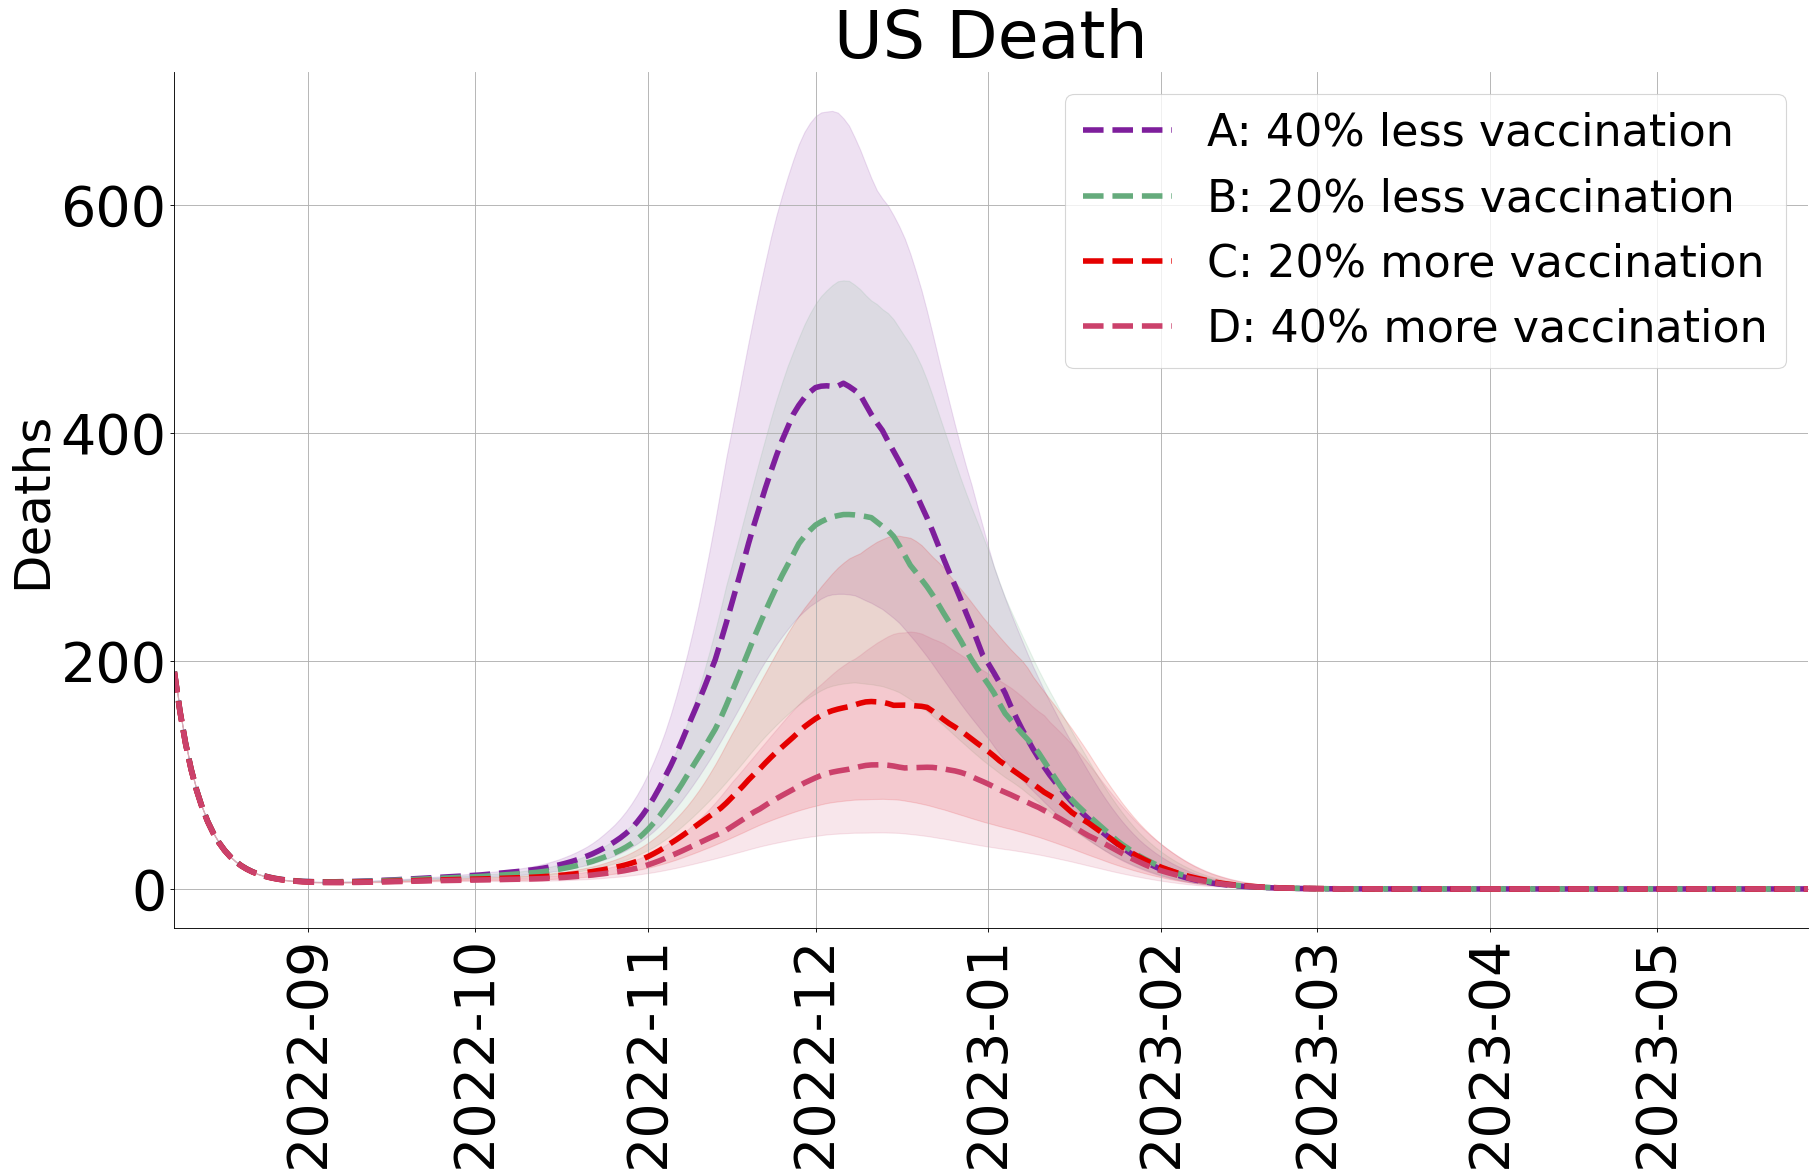

In [71]:
drange1 = pd.date_range("2022-08-08", periods=294, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""
plt.fill_between(drange1, new_death_p_A[:,2], new_death_p_A[:,21], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_death_p_A[:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

plt.fill_between(drange1, new_death_p_B[:,2], new_death_p_B[:,21], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_death_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'B: 20% less vaccination')


plt.fill_between(drange1, new_death_p_C[:,2], new_death_p_C[:,21], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_death_p_C[:,12], '--', color='xkcd:red', lw=5, label = 'C: 20% more vaccination')

plt.fill_between(drange1, new_death_p_D[:,2], new_death_p_D[:,21], color='xkcd:dark pink', alpha=0.13)
plt.plot(drange1, new_death_p_D[:,12], '--', color='xkcd:dark pink', lw=5, label = 'D: 40% more vaccination')

'''plt.fill_between(drange1, new_death_p_E[:,2], new_death_p_E[:,21], color='xkcd:dark blue', alpha=0.13)
plt.plot(drange1, new_death_p_E[:,12], '--', color='xkcd:dark blue', lw=5, label = 'E: 100% 65+ population vaccinated')

plt.fill_between(drange1, new_death_p_F[:,2], new_death_p_F[:,21], color='xkcd:dark yellow', alpha=0.13)
plt.plot(drange1, new_death_p_F[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'E: 100% 50_64+ population vaccinated')
'''


#plt.plot(drange1, death_avg, 'k-o', markersize=14)

plt.xticks(rotation=90)
plt.ylabel('Deaths', fontsize = 45)
plt.title(state + ' Death') 
plt.legend(fontsize=40);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.savefig('flufigures/'+state+'Death.jpeg')

In [76]:
def to_week_cum(case, state, typee):
    case_cum = np.zeros([294, 25])
    case_w = np.zeros([42, 25])
    
    if (typee == 'hosp'):

        for i in range(1,294):
            case_cum[i,:] = case_cum[i-1,:] + case[i,:] 

        for j in range(25):    
            for i in range(41):
                case_w[i, j] = np.mean(case_cum[ i*7:(i+1)*7, j])
    else:
        for i in range(1,294):
            case_cum[i,:] = case_cum[i-1,:] + case[i,:] 

        for j in range(25):    
            for i in range(41):
                case_w[i, j] = np.mean(case_cum[ i*7:(i+1)*7, j])        

    return case_w[0:41,:]

In [83]:
cum_hosp_A = to_week_cum(new_hosp_p_A, 'US','hosp')
cum_hosp_B = to_week_cum(new_hosp_p_B, 'US','hosp')
cum_hosp_C = to_week_cum(new_hosp_p_C, 'US','hosp')
cum_hosp_D = to_week_cum(new_hosp_p_D, 'US','hosp')
#cum_hosp_E = to_week_cum(new_hosp_p_E, 'US','hosp')
#cum_hosp_F = to_week_cum(new_hosp_p_F, 'US','hosp')
#cum_hosp_G = to_week_cum(new_hosp_p_G, 'US','hosp')
#cum_hosp_H = to_week_cum(new_hosp_p_H, 'US','hosp')
#cum_hosp_I = to_week_cum(new_hosp_p_I, 'US','hosp')
cum_hosp_base=to_week_cum(hosp_avg2, 'US','hosp')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [97]:
#data_test = hosp_avg
#print(data_test.shape)

# Generate the cumulative sum of the array
#cumulative_hosp_avg = np.cumsum(data_test)

# Print the original and cumulative arrays
#print("Original array:", data_test)
#print("Cumulative hosp_avg:", cumulative_hosp_avg)

(206,)
Original array: [  77.14285714   77.85714286   79.           82.           80.71428571
   79.           79.85714286   79.71428571   79.           80.71428571
   79.42857143   78.           77.71428571   79.           81.57142857
   85.71428571   82.85714286   84.14285714   84.42857143   83.85714286
   82.14285714   82.           81.           80.           79.14285714
   78.71428571   81.85714286   82.28571429   83.42857143   84.57142857
   87.28571429   91.85714286   92.           89.57142857   87.28571429
   85.           84.           85.71428571   82.42857143   85.
   88.57142857   93.14285714   98.71428571  101.14285714  103.85714286
  106.71428571  111.71428571  116.57142857  120.28571429  122.14285714
  131.85714286  141.28571429  153.          158.85714286  166.42857143
  176.42857143  184.14285714  186.71428571  191.71428571  197.57142857
  207.42857143  216.57142857  223.14285714  233.71428571  244.57142857
  259.85714286  273.14285714  282.28571429  296.14285714  312.

<Figure size 432x288 with 0 Axes>

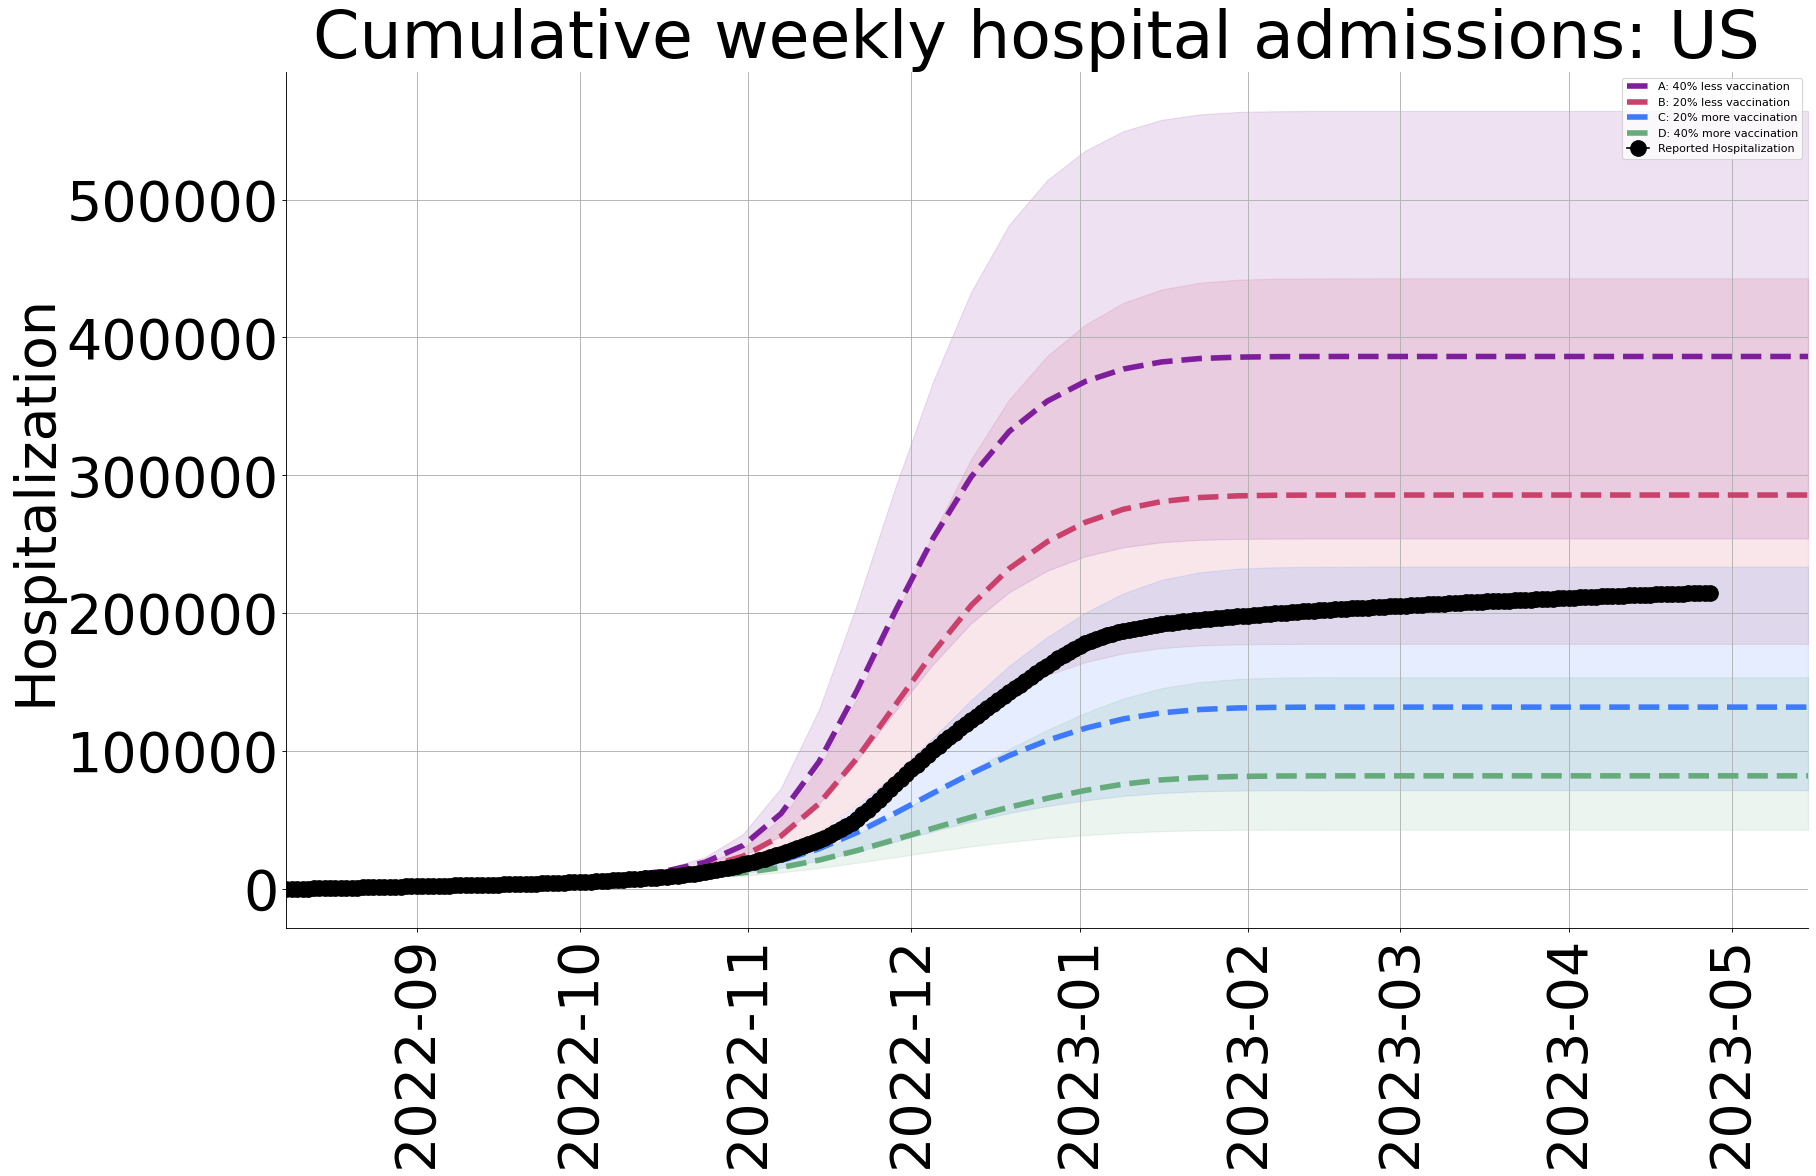

In [85]:
    plt.figure()
    drange1 = pd.date_range("2022-08-08", periods=41, freq="7D")
    drange3 = pd.date_range("2022-08-08", periods=263, freq="1D")
    fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 50})

    plt.fill_between(drange1, cum_hosp_A[:,2], cum_hosp_A[:,21], color='xkcd:purple', alpha=0.13)
    plt.plot(drange1, cum_hosp_A [:,12], '--', color='xkcd:purple', lw=5, label = 'A: 40% less vaccination')

    plt.fill_between(drange1, cum_hosp_B[:,2], cum_hosp_B[:,21], color='xkcd:dark pink', alpha=0.13)
    plt.plot(drange1, cum_hosp_B[:,12], '--', color='xkcd:dark pink', lw=5, label = 'B: 20% less vaccination')

    plt.fill_between(drange1, cum_hosp_C[:,2], cum_hosp_C[:,21], color='xkcd:lightish blue', alpha=0.13)
    plt.plot(drange1, cum_hosp_C[:,12], '--', color='xkcd:lightish blue', lw=5, label = 'C: 20% more vaccination')

    plt.fill_between(drange1, cum_hosp_D[:,2], cum_hosp_D[:,21], color='xkcd:tea', alpha=0.13)
    plt.plot(drange1, cum_hosp_D[:,12], '--', color='xkcd:tea', lw=5, label = 'D: 40% more vaccination')
    
    #plt.fill_between(drange1, cum_hosp_E[:,2], cum_hosp_E[:,21], color='xkcd:dark yellow', alpha=0.13)
    #plt.plot(drange1, cum_hosp_E[:,12], '--', color='xkcd:dark yellow', lw=5, label = 'E: 100% 65+ population vaccinated')
    
    #plt.fill_between(drange1, cum_hosp_F[:,2], cum_hosp_F[:,21], color='xkcd:dark orange', alpha=0.13)
    #plt.plot(drange1, cum_hosp_F[:,12], '--', color='xkcd:dark orange', lw=5, label = 'E: 100% 50_64 population vaccinated')
    
    #plt.fill_between(drange1, cum_hosp_G[:,2], cum_hosp_G[:,21], color='xkcd:red', alpha=0.13)
    #plt.plot(drange1, cum_hosp_G[:,12], '--', color='xkcd:red', lw=5, label = 'G; 100%  of 19_49 population vaccinated')

    #plt.fill_between(drange1, cum_hosp_H[:,2], cum_hosp_H[:,21], color='xkcd:dark green', alpha=0.13)
    #plt.plot(drange1, cum_hosp_H[:,12], '--', color='xkcd:dark green', lw=5, label = 'H; 100%  of 0_18 population vaccinated')

    #plt.fill_between(drange1, cum_hosp_I[:,2], cum_hosp_I[:,21], color='xkcd:blue', alpha=0.13)
    #plt.plot(drange1, cum_hosp_I[:,12], '--', color='xkcd:blue', lw=5, label = 'I; 0%  of 65+ population vaccinated')




    plt.plot(drange3, np.cumsum(hosp_avg2), 'k-o', markersize=14,label = 'Reported Hospitalization')

    plt.title("Cumulative weekly hospital admissions: " + state + " ")

    plt.xticks(rotation=90)
    plt.ylabel('Hospitalization')
    plt.legend(fontsize=10);
    plt.autoscale(enable=True, axis='x', tight=True) 
    plt.grid() 
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    #plt.savefig('flufigures/'+state+'Cumulative Weekly Hospitalizations')

In [79]:
import datetime


def calcul_peak_date(case):
    LEN=len(case)
    peaks = np.zeros([25,])
    peak_d = np.zeros([25,])
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 

    date_s = np.zeros([25,])
    for j in range(25):
        for i in range(0,LEN):
            peaks[j] = np.max(case[0:LEN,j])

            if (case[i,j] >= peaks[j]):
                peak_d[j] = i


            
    #my_date_l = my_date + datetime.timedelta(days = i)
    #my_date_l = my_date_l.strftime('%m/%d')

    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')  
    
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[21])
    my_date_95 = my_date_95.strftime('%m/%d')      
    
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")


In [80]:
import datetime


def calcul_peak(case):
    LEN=len(case)

    peak_I_d_h = 0
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 
 
    my_date_h = datetime.datetime(2022, 8, 8, 0, 0, 0) 


    peak_I_l = np.max(case[0:LEN,2])
    peak_I_m = np.max(case[0:LEN,12])
    peak_I_h = np.max(case[0:LEN,21])
    
    for i in range(0,LEN):
        if (case[i,2] >= peak_I_l):
            peak_I_d_l = i
            my_date_l = my_date + datetime.timedelta(days = i)
            my_date_l = my_date_l.strftime('%m/%d')
        
        if (case[i,12] >= peak_I_m):
            peak_I_d_m = i
            my_date_m = my_date + datetime.timedelta(days = i)
            my_date_m = my_date_m.strftime('%m/%d')
            
        if (case[i,21] >= peak_I_h):
            peak_I_d_h = i
            my_date_h = my_date + datetime.timedelta(days = i)
            my_date_h = my_date_h.strftime('%m/%d')
            
    
    print(str(round(peak_I_m)) + " [" + str(round(peak_I_l)) + ", " + str(round(peak_I_h)) + "]")
    print(str((my_date_m)) + " [" + str((my_date_l)) + ", " + str((my_date_h)) + "]")

In [82]:
calcul_peak_date(new_hosp_p_A)
calcul_peak_date(new_hosp_p_B)
calcul_peak_date(new_hosp_p_C)
calcul_peak_date(new_hosp_p_D)
calcul_peak_date(new_hosp_p_T4)

114.0
11/30 [11/28, 12/01]
117.0
12/03 [11/30, 12/06]
124.0
12/10 [12/04, 12/12]
126.0
12/12 [12/07, 12/13]
108.0
11/24 [11/23, 11/26]


In [83]:
calcul_peak(new_hosp_p_A)
calcul_peak(new_hosp_p_B)
calcul_peak(new_hosp_p_C)
calcul_peak(new_hosp_p_D)
calcul_peak(new_hosp_p_T4)
aaa=np.max(H_ov_avg)
for i in range(0,len(H_ov_avg)):
    if (H_ov_avg[i] >= aaa):
        print(i)

5514 [3291, 8524]
12/01 [12/01, 11/29]
4449 [2551, 7144]
12/02 [12/03, 12/01]
2773 [1430, 4876]
12/11 [12/10, 12/12]
2113 [1043, 4001]
12/13 [12/11, 12/13]
9430 [6182, 13431]
11/24 [11/26, 11/23]
119


In [84]:
np.sum(hosp_avg2)

214915.2857142857

In [85]:
def calcul_cum(case):


    peak_I_l = np.sum(case[0:263,2])
    peak_I_m = np.sum(case[0:263,12])
    peak_I_h = np.sum(case[0:263,21])
    

    
    print(str(round(peak_I_m)) + " [" + str(round(peak_I_l)) + ", " + str(round(peak_I_h)) + "]")

In [86]:
calcul_cum(new_hosp_p_A)
calcul_cum(new_hosp_p_B)
calcul_cum(new_hosp_p_C)
calcul_cum(new_hosp_p_D)
calcul_cum(new_hosp_p_T4)

280205 [177230, 427843]
238362 [146240, 376546]
164958 [93683, 281225]
133296 [72442, 237429]
419407 [283838, 593604]
